## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Read Data and Show it

In [2]:
data=pd.read_csv('supermarket_sales.csv')

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Show Information and Description 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Data Cleansing

In [6]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
def concatenate_date_columns(data):
    for index in range(len(data.index)):
        data.loc[index,'Date']=data.loc[index,'Date']+' '+data.loc[index,'Time']
    data.drop('Time',axis=1,inplace=True)
    return data    

In [9]:
data=concatenate_date_columns(data)

In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data['Date'].dt.month[:5].values

array([1, 3, 3, 1, 2])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

## Data Analysis and Visualization

In [157]:
def plot_Labeled_Columns(numeric_col):
    plt.figure(figsize=(25,25))
    plot_num=1
    for col in data.columns:
        if type(data[col][0])==type(' '):
            plt.subplot(4,2,plot_num)
            if plot_num==1:
                plt.title('Top 10 Invoice by '+numeric_col.capitalize())
                sorted_data=data.sort_values(by=numeric_col).iloc[-10:,:]
                sns.barplot(data=sorted_data,x=numeric_col,y=col,orient='h',palette='magma')
            else:
                if data[col].nunique()<=2:
                    cmap=cm.get_cmap('magma')
                    norm=plt.Normalize(min(data[numeric_col].values),max(data[numeric_col].values))
                    colors=cmap(norm(data[numeric_col].values))
                    plt.title(numeric_col.capitalize()+' by '+col.capitalize())
                    if numeric_col=='Rating':
                        average_values=[data[data[col]==category][numeric_col].values.mean() for category in data[col].unique()]
                        plt.pie(data=data,x=average_values,labels=data[col].unique(),colors=colors,autopct='%1.1f%%')
                    else:    
                        sum_values=[sum(data[data[col]==category][numeric_col].values) for category in data[col].unique()]
                        plt.pie(data=data,x=sum_values,labels=data[col].unique(),colors=colors,autopct='%1.1f%%')
                else:
                    plt.title(numeric_col.capitalize()+' by '+col.capitalize())
                    if numeric_col=='Rating':
                        average_values=[data[data[col]==category][numeric_col].values.mean() for category in data[col].unique()]
                        sns.barplot(x=data[col].unique(),y=average_values,orient='v',palette='magma')
                    else: 
                        sns.barplot(data=data,x=col,y=numeric_col,orient='v',palette='magma')
            plot_num+=1
        elif type(data[col][0])==type(pd.to_datetime('1/1/2001')):
            plt.subplot(4,2,plot_num)
            plt.title(numeric_col.capitalize()+' by Month')
            if numeric_col=='Rating':
                max_values_months=[max(data[data[col].dt.month==mon][numeric_col].values) for mon in data[col].dt.month.unique()]
                plt.plot(data[col].dt.month_name().unique(),max_values_months,color='purple',marker='o')
            else:
                sum_values_months=[sum(data[data[col].dt.month==mon][numeric_col].values) for mon in data[col].dt.month.unique()]
                plt.plot(data[col].dt.month_name().unique(),sum_values_months,color='purple',marker='o')    
            plot_num+=1
        else:
            continue 
    plt.show()       

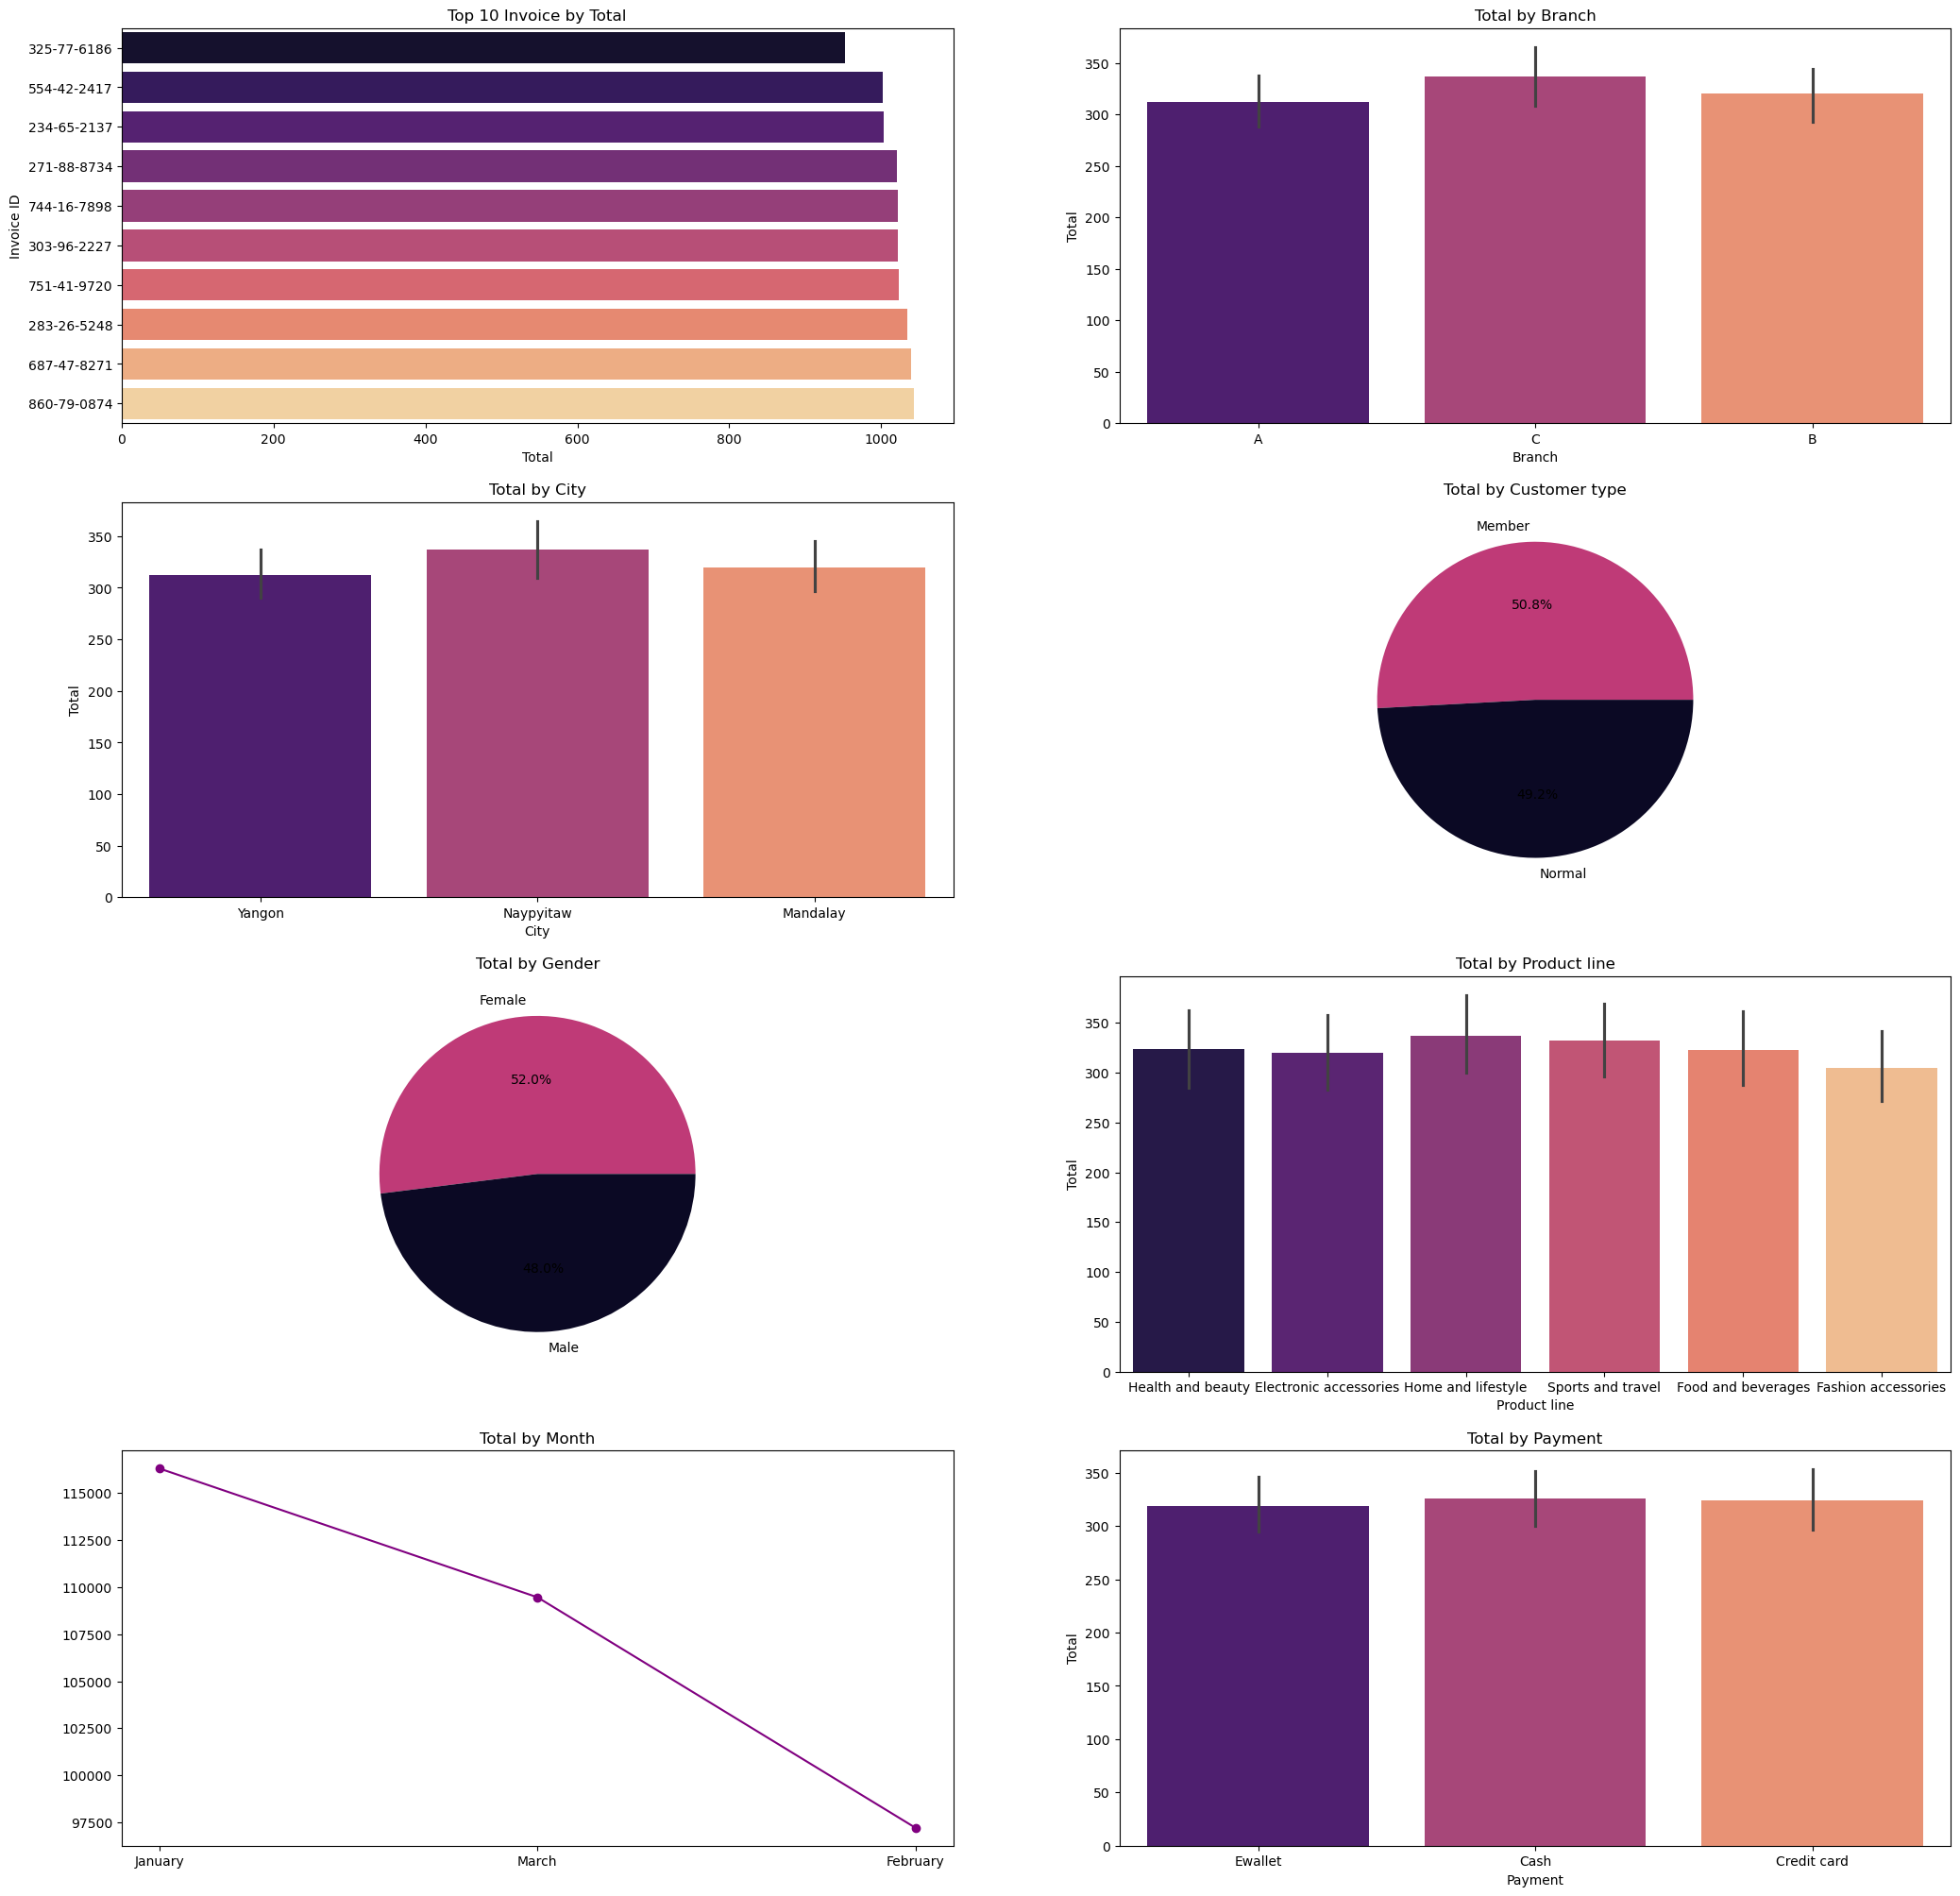

In [158]:
numeric_col1='Total'
plot_Labeled_Columns(numeric_col1)

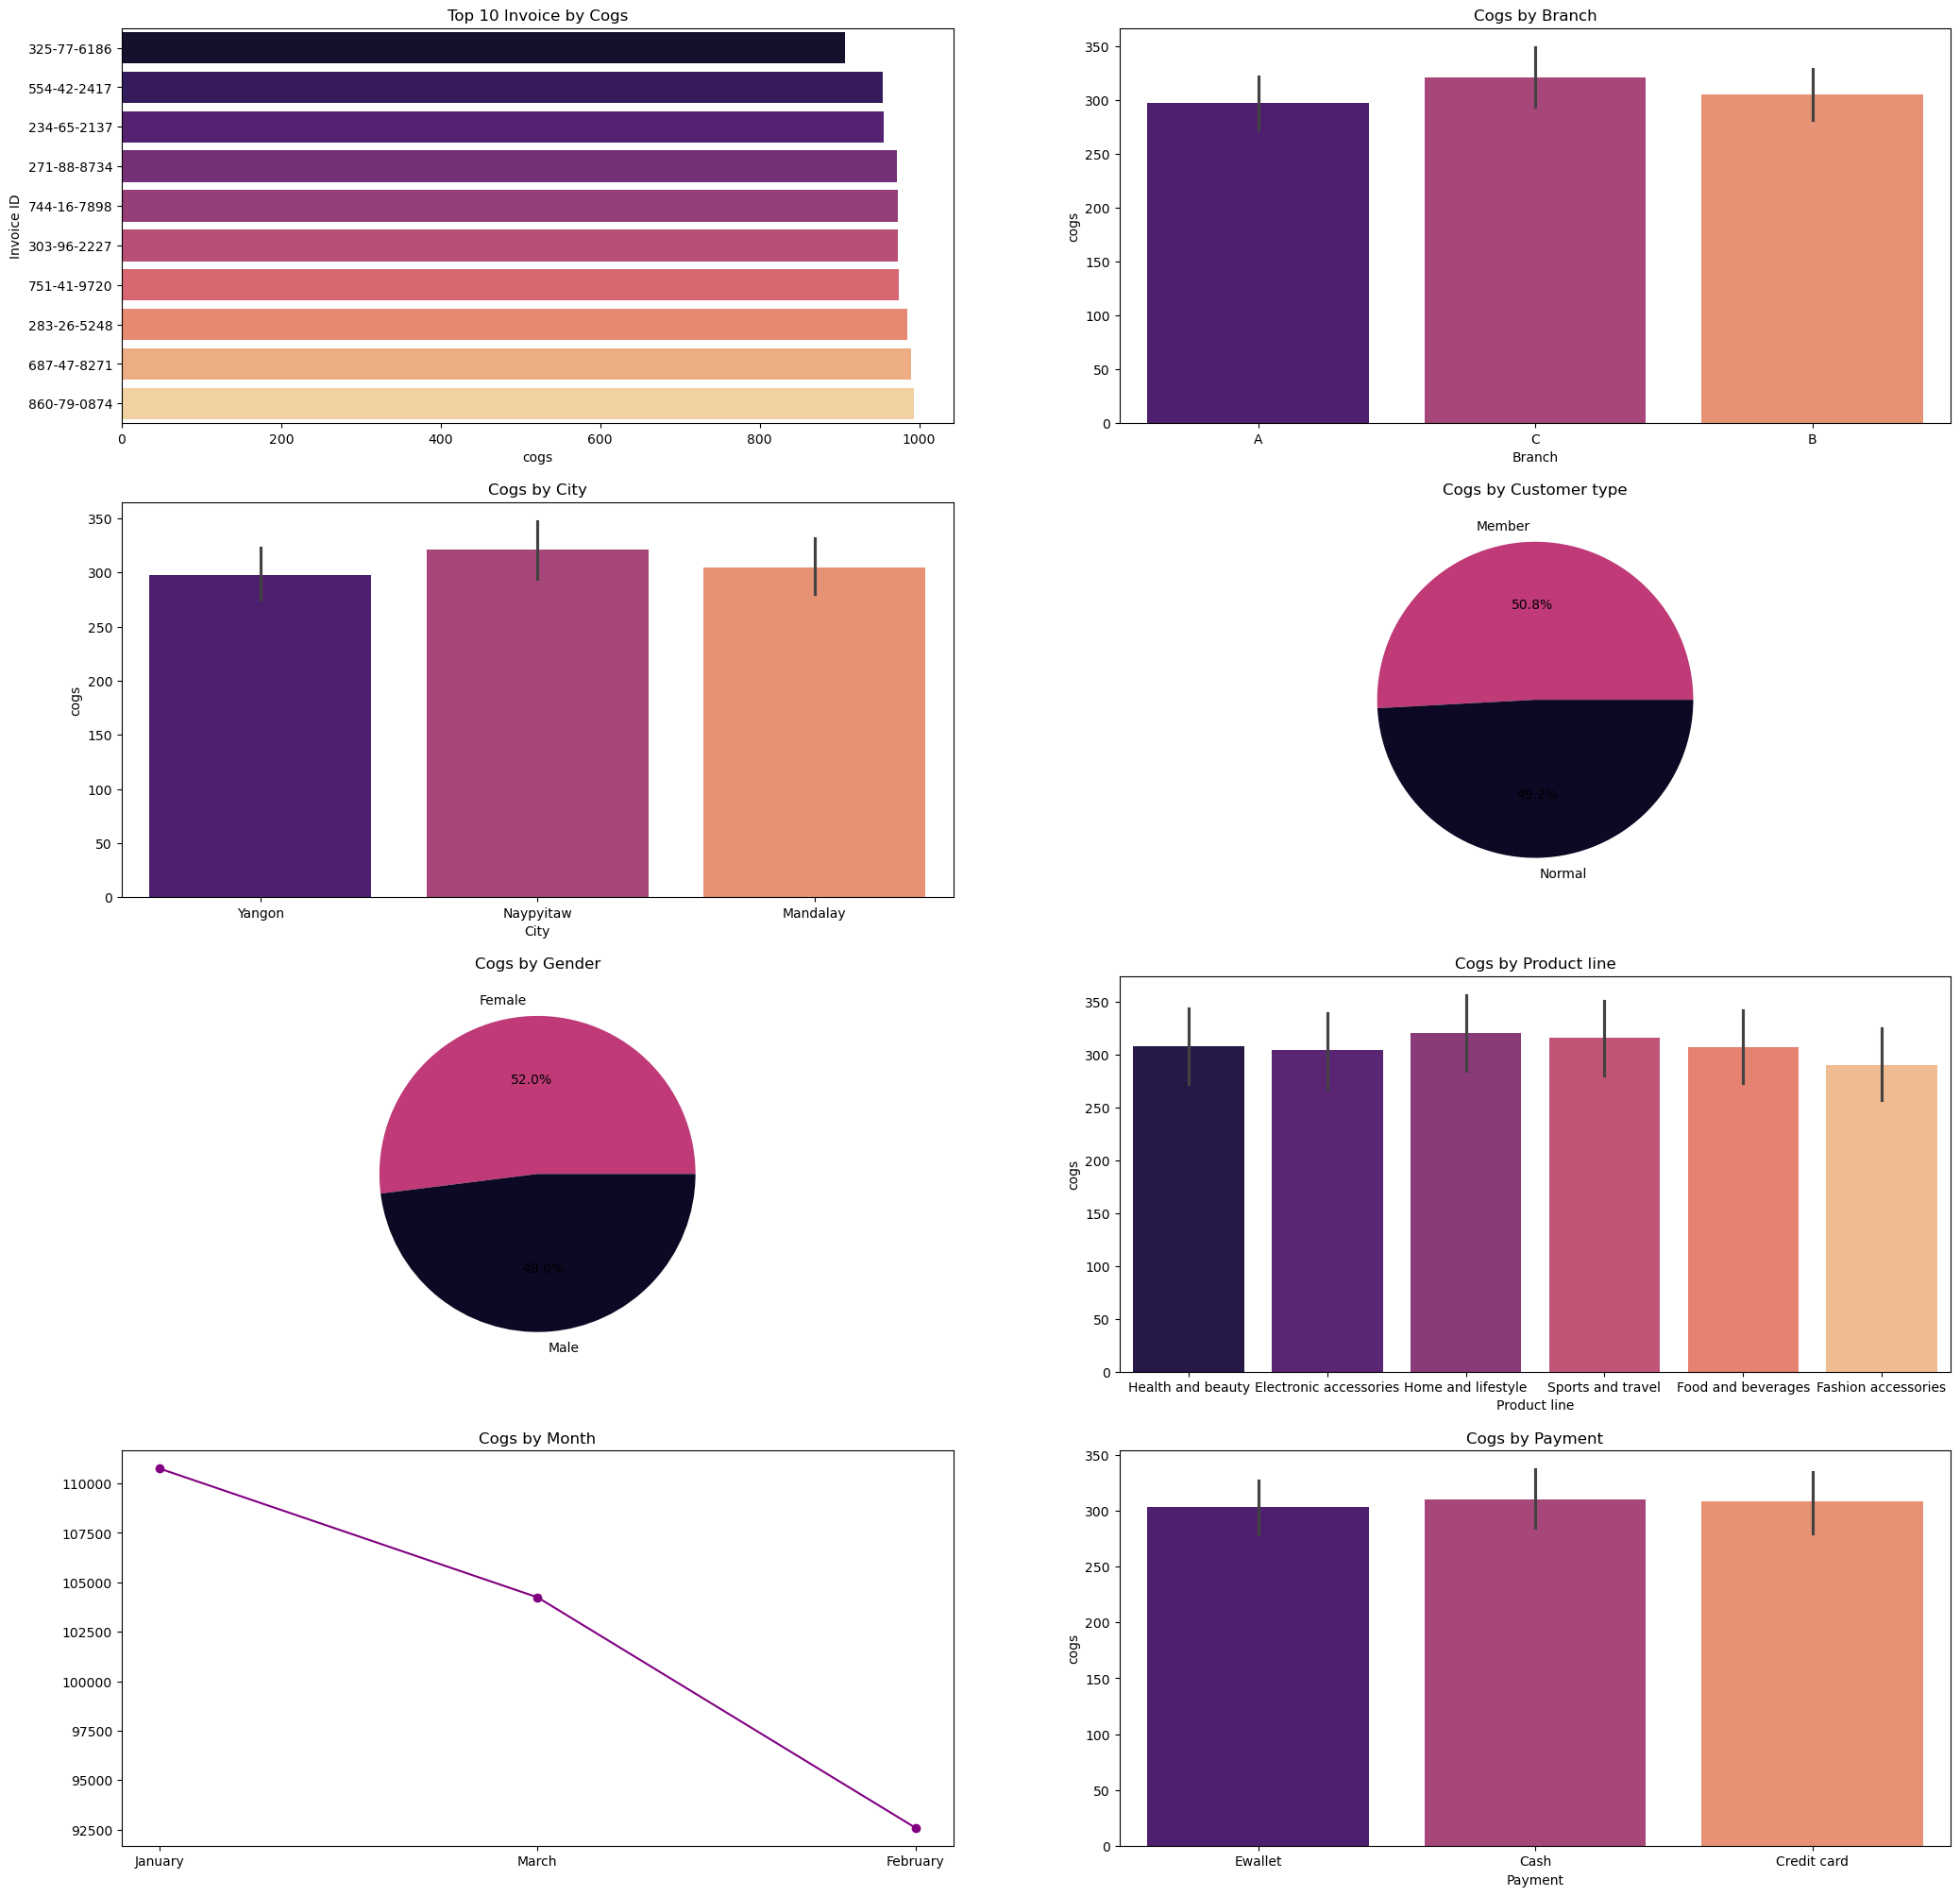

In [159]:
numeric_col2='cogs'
plot_Labeled_Columns(numeric_col2)

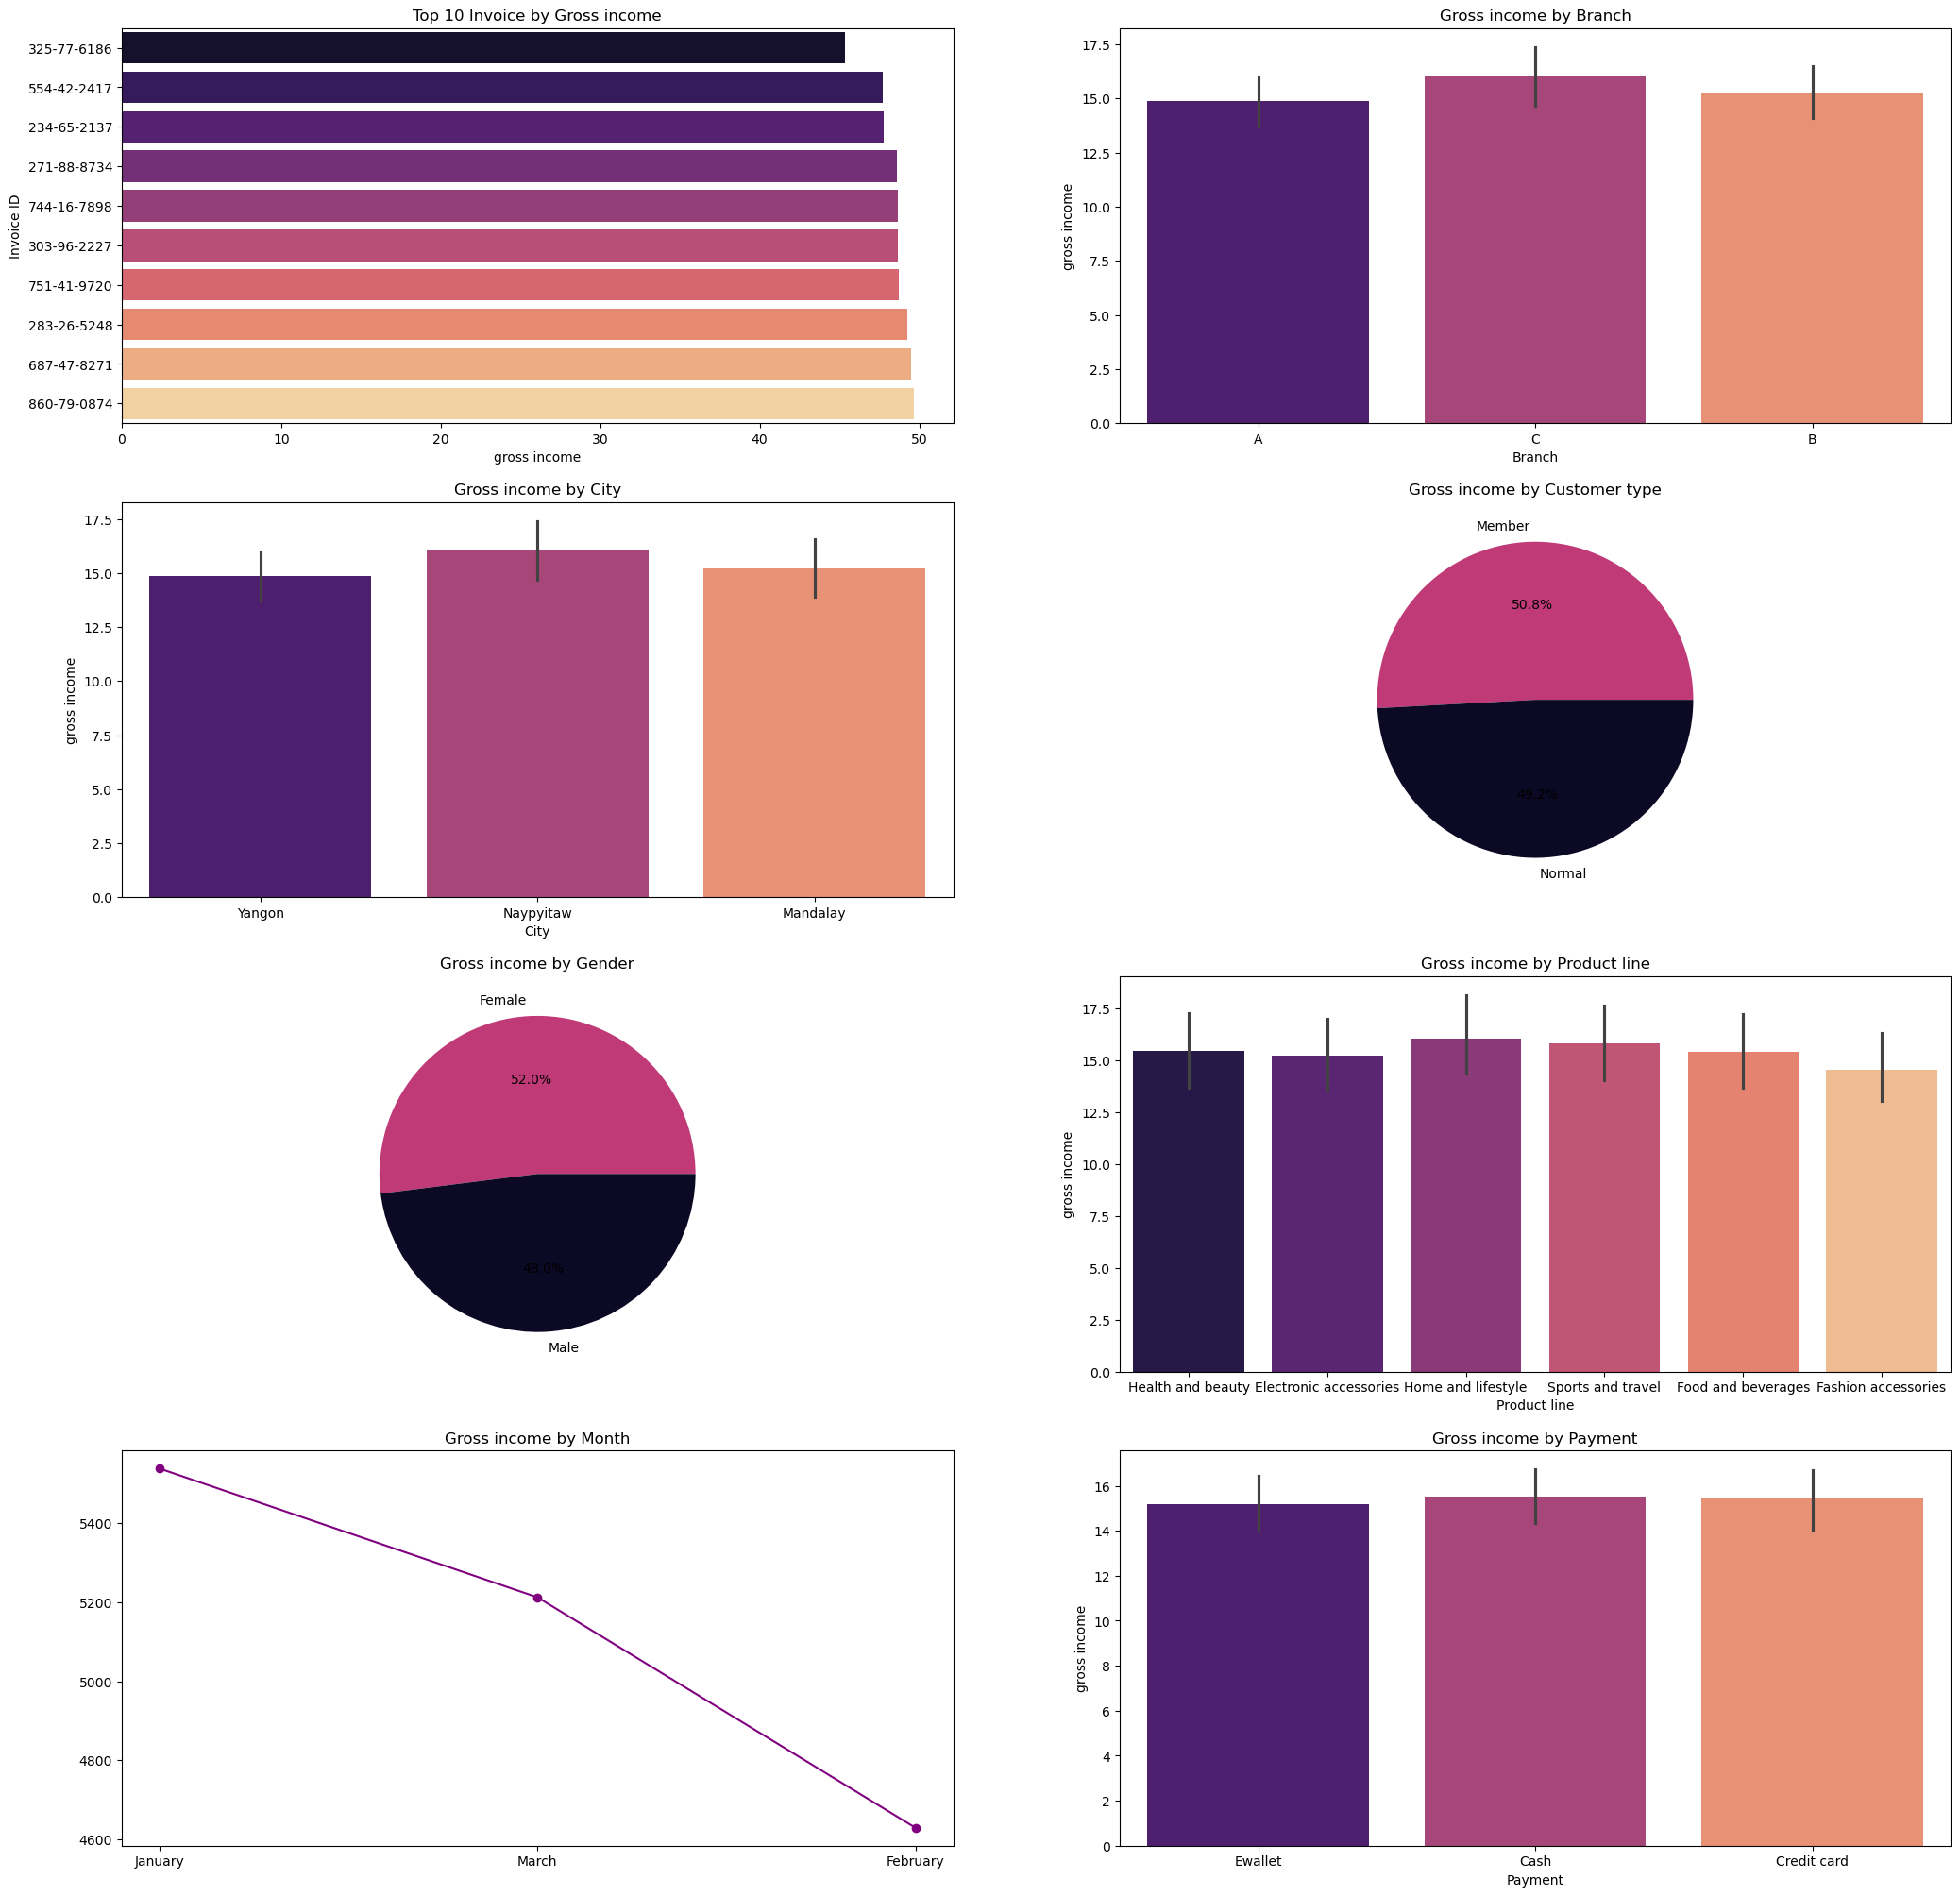

In [160]:
numeric_col3='gross income'
plot_Labeled_Columns(numeric_col3)

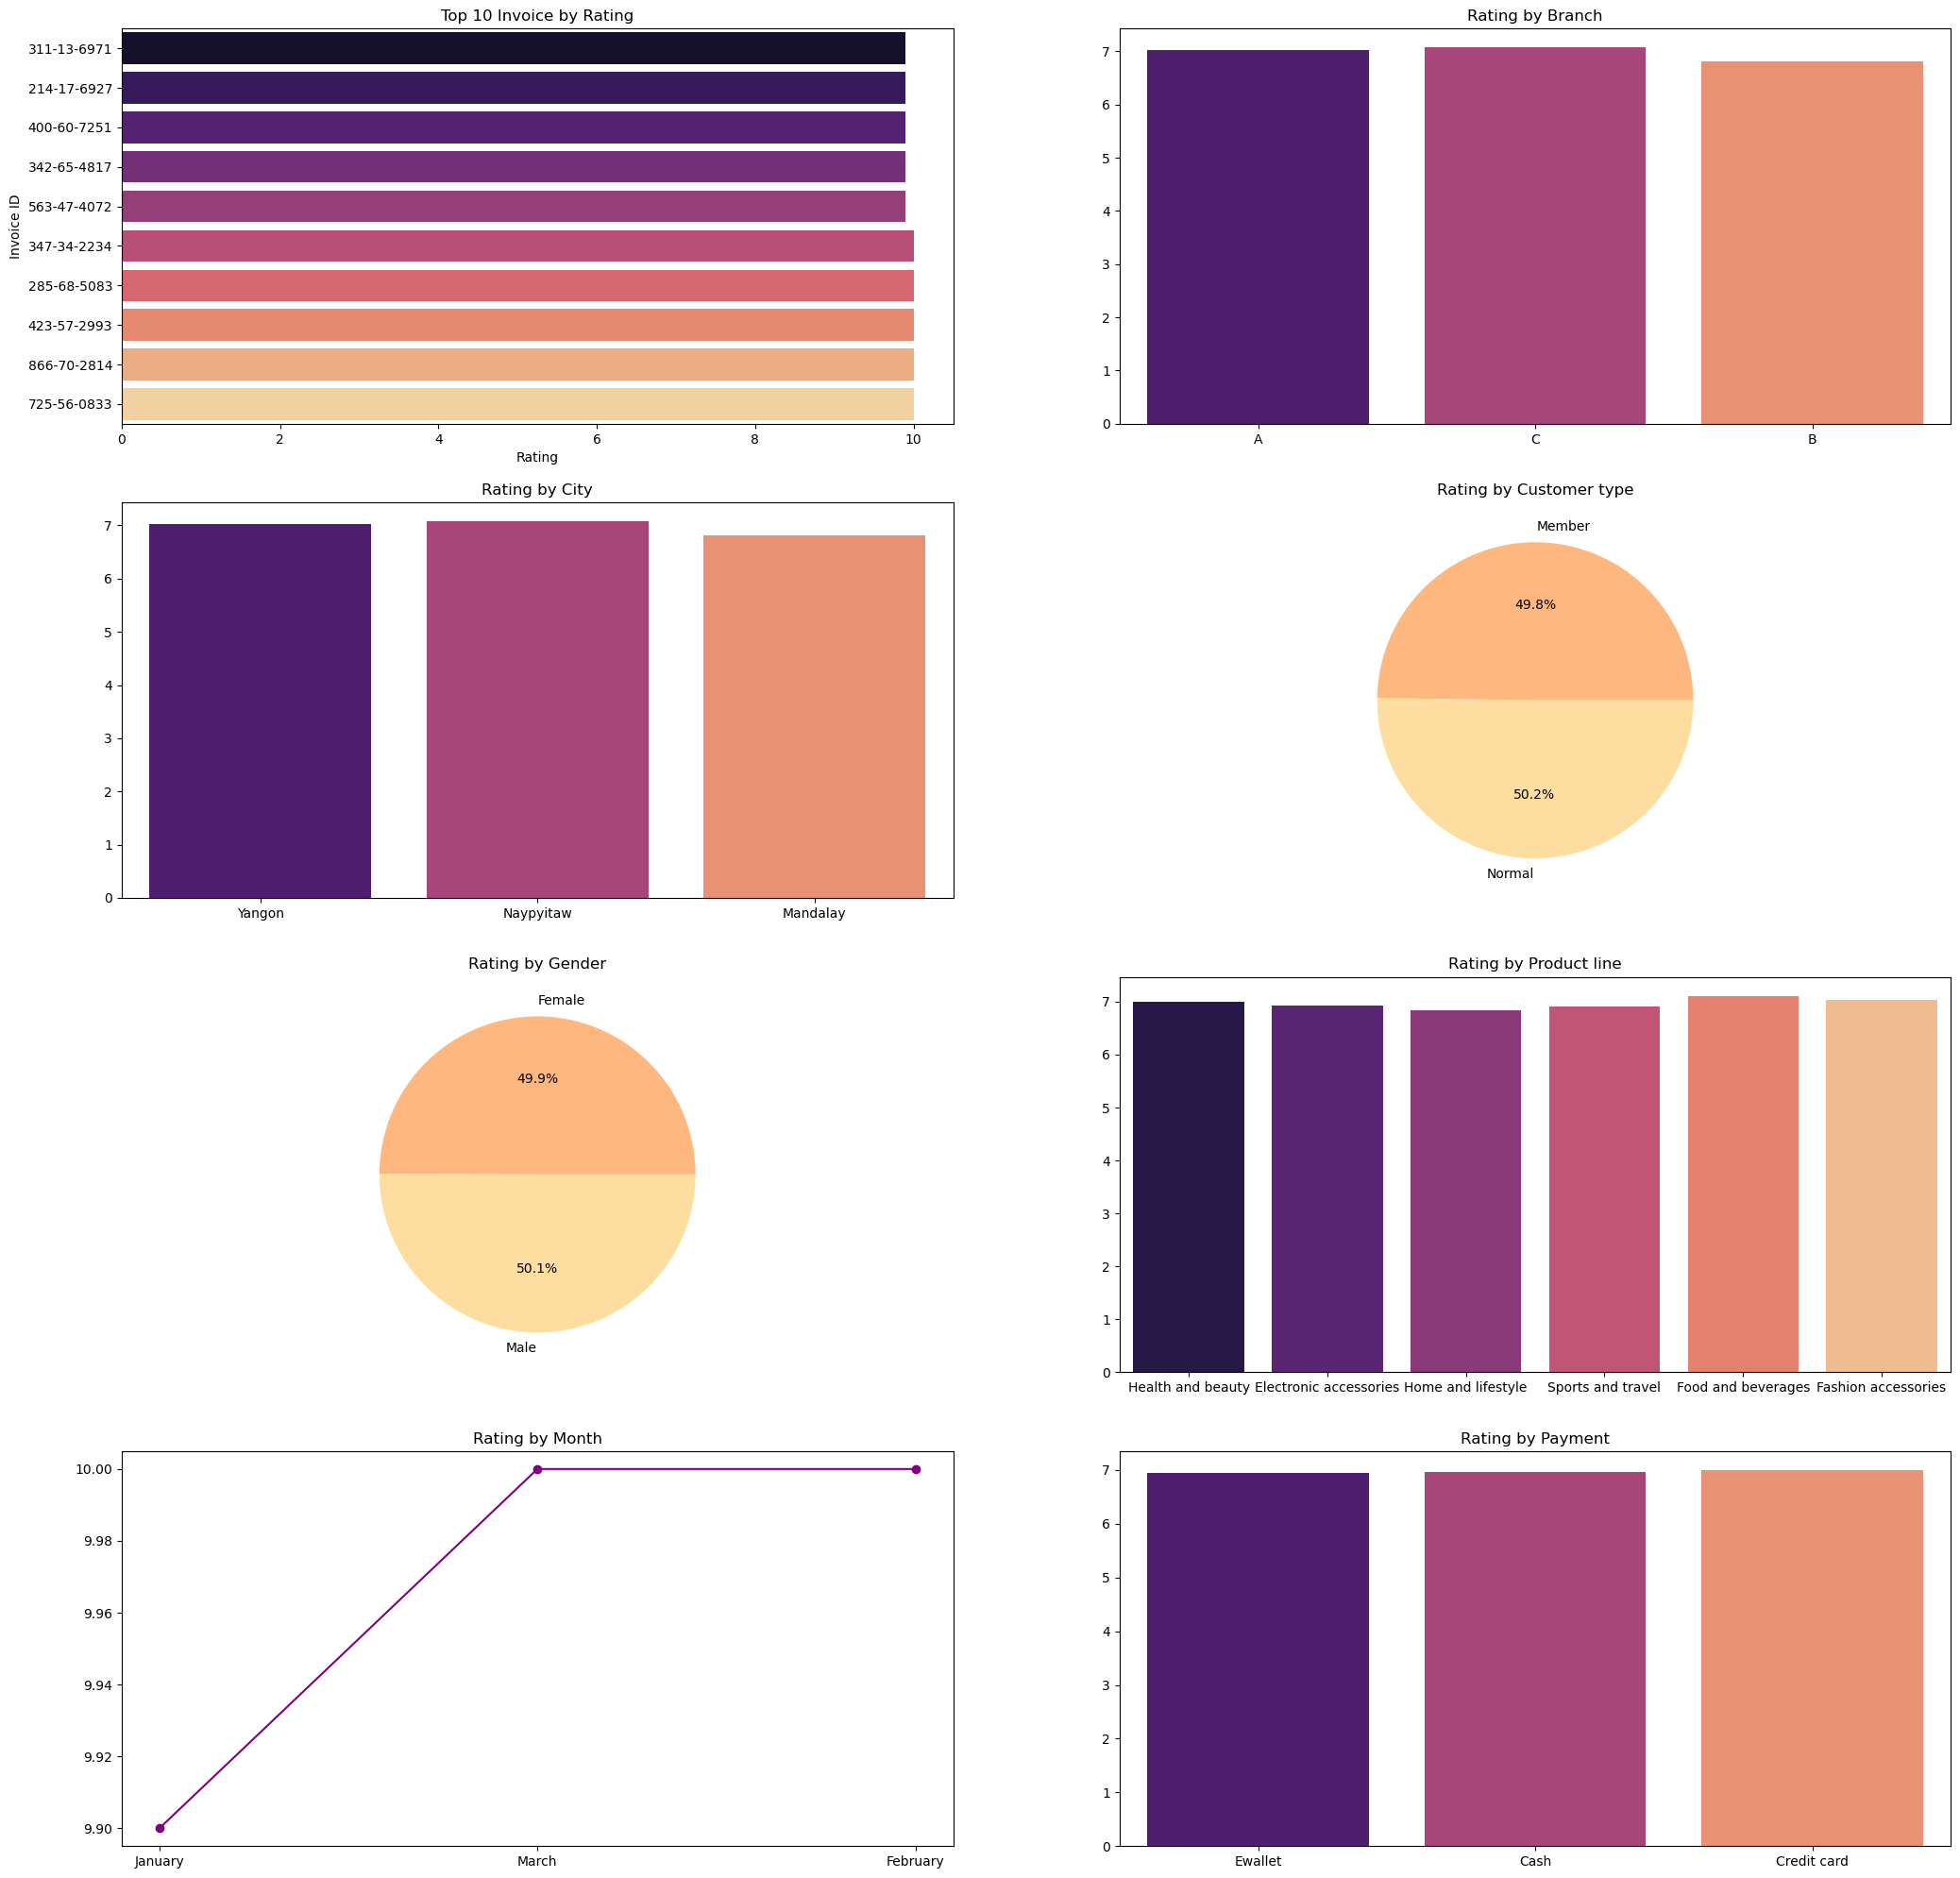

In [161]:
numeric_col4='Rating'
plot_Labeled_Columns(numeric_col4)

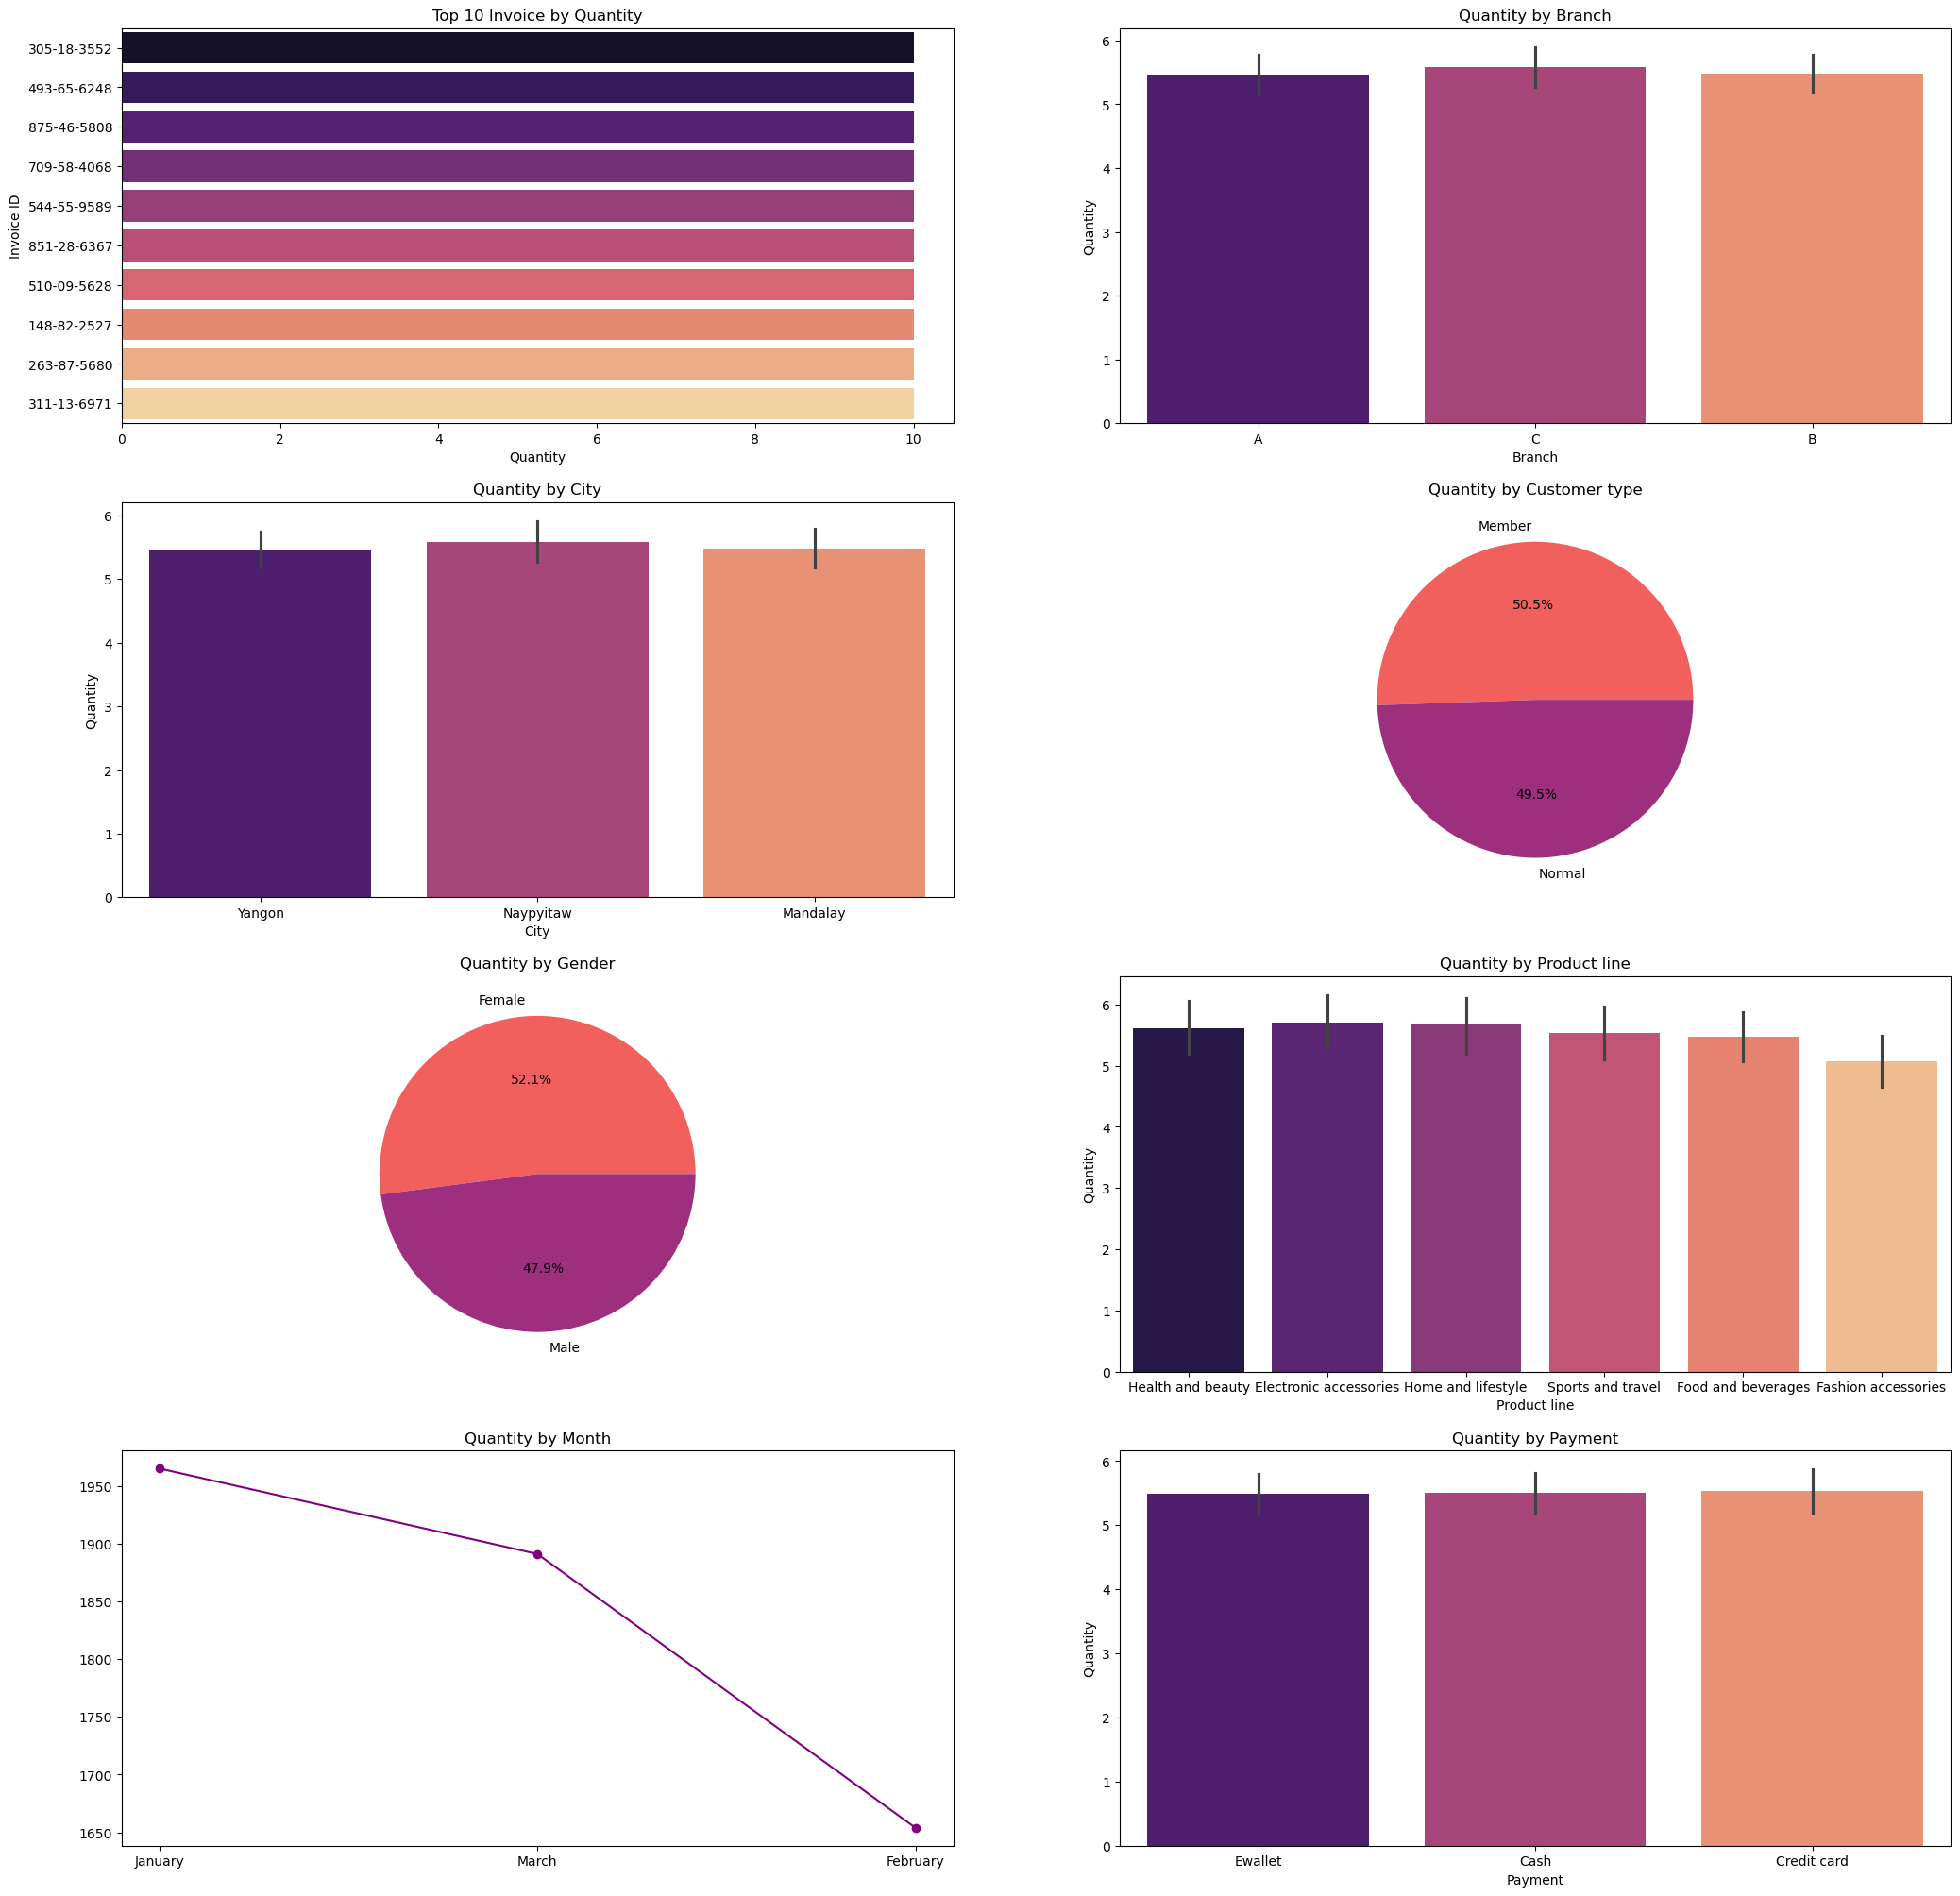

In [162]:
numeric_col5='Quantity'
plot_Labeled_Columns(numeric_col5)

## Data Preprocessing

In [13]:
data=data.drop('Invoice ID',axis=1)

In [14]:
def Label_encoders(data):
    lbls={}
    for col in data.columns:
        if type(data[col][0])==type(' '):
            label=LabelEncoder()
            data[col]=label.fit_transform(data[col])
            lbls[col]=label
    return data,lbls        

In [15]:
data,lbls=Label_encoders(data)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   int32         
 1   City                     1000 non-null   int32         
 2   Customer type            1000 non-null   int32         
 3   Gender                   1000 non-null   int32         
 4   Product line             1000 non-null   int32         
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Payment                  1000 non-null   int32         
 11  cogs                     1000 non-null   float64       
 12  gross margin percentage  1000 non-n

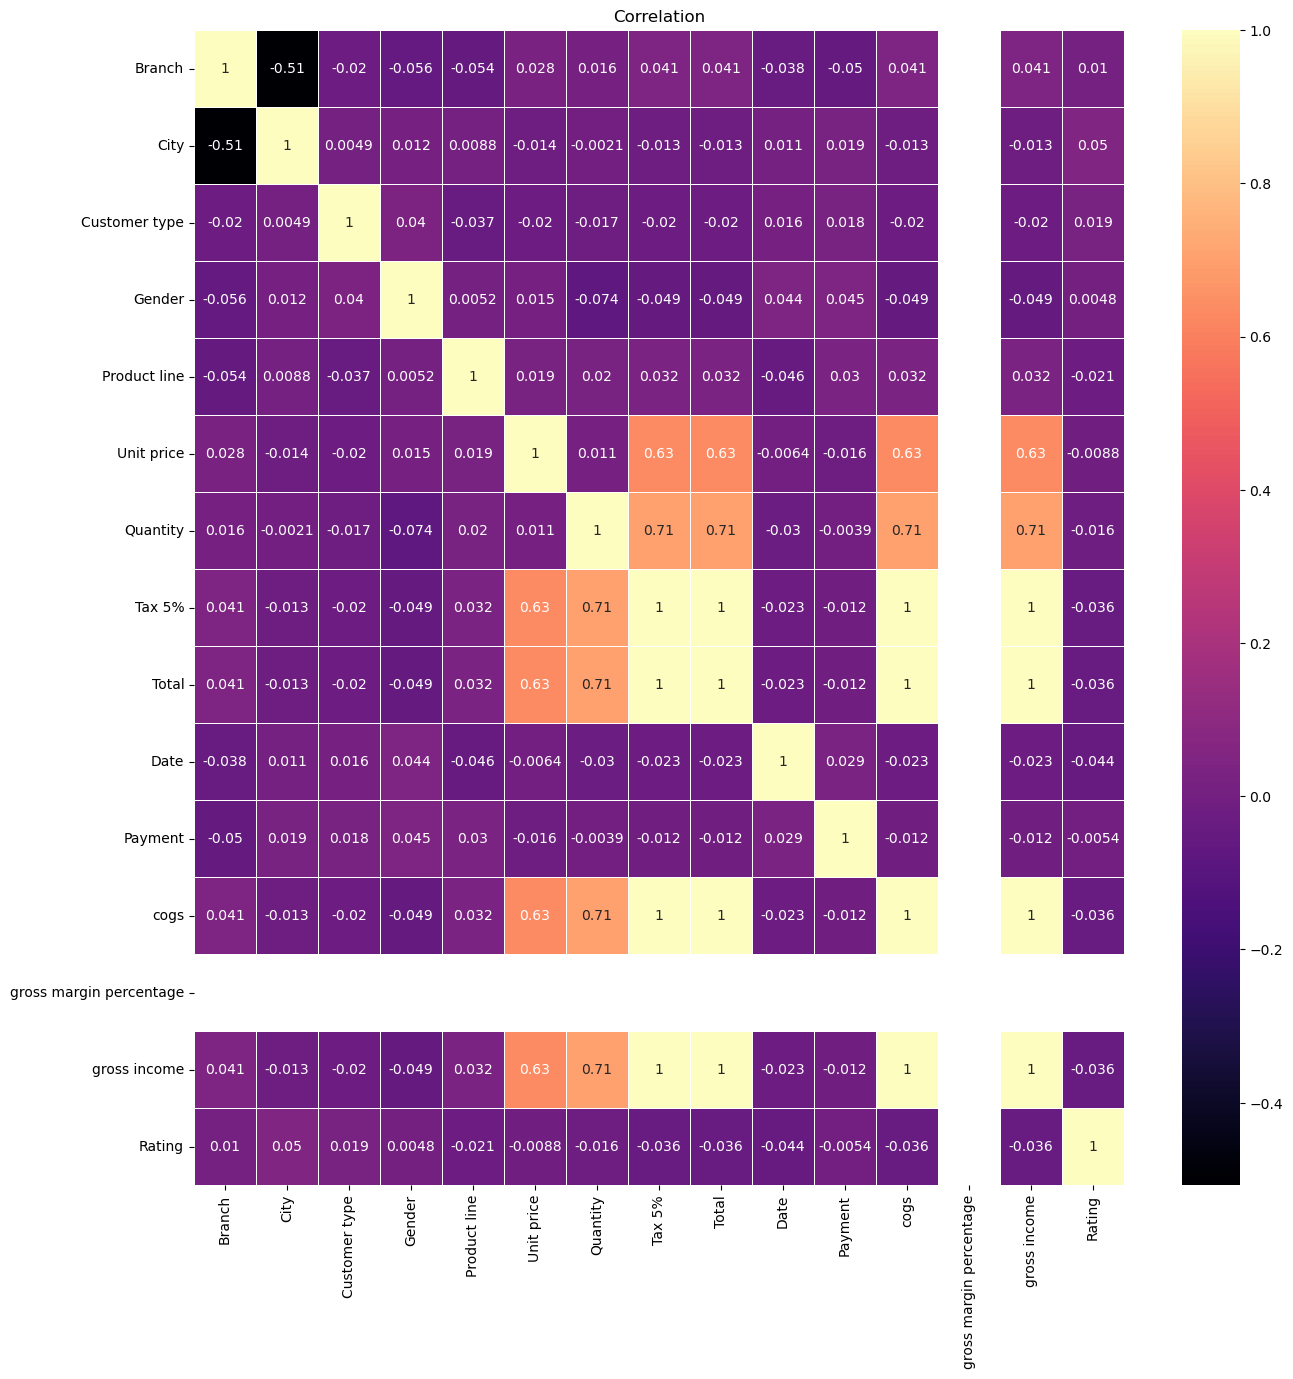

In [17]:
plt.figure(figsize=(15,15))
plt.title("Correlation")
sns.heatmap(data.corr(),annot=True,cmap='magma',linecolor='white',linewidths=0.5)
plt.show()

In [18]:
data=data.drop(['gross income','gross margin percentage','cogs','Tax 5%'],axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   int32         
 1   City           1000 non-null   int32         
 2   Customer type  1000 non-null   int32         
 3   Gender         1000 non-null   int32         
 4   Product line   1000 non-null   int32         
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   int32         
 10  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(6), int64(1)
memory usage: 62.6 KB


In [20]:
data['Month']=data['Date'].dt.month

In [21]:
data.drop('Date',axis=1,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   int32  
 1   City           1000 non-null   int32  
 2   Customer type  1000 non-null   int32  
 3   Gender         1000 non-null   int32  
 4   Product line   1000 non-null   int32  
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   int32  
 9   Rating         1000 non-null   float64
 10  Month          1000 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 58.7 KB


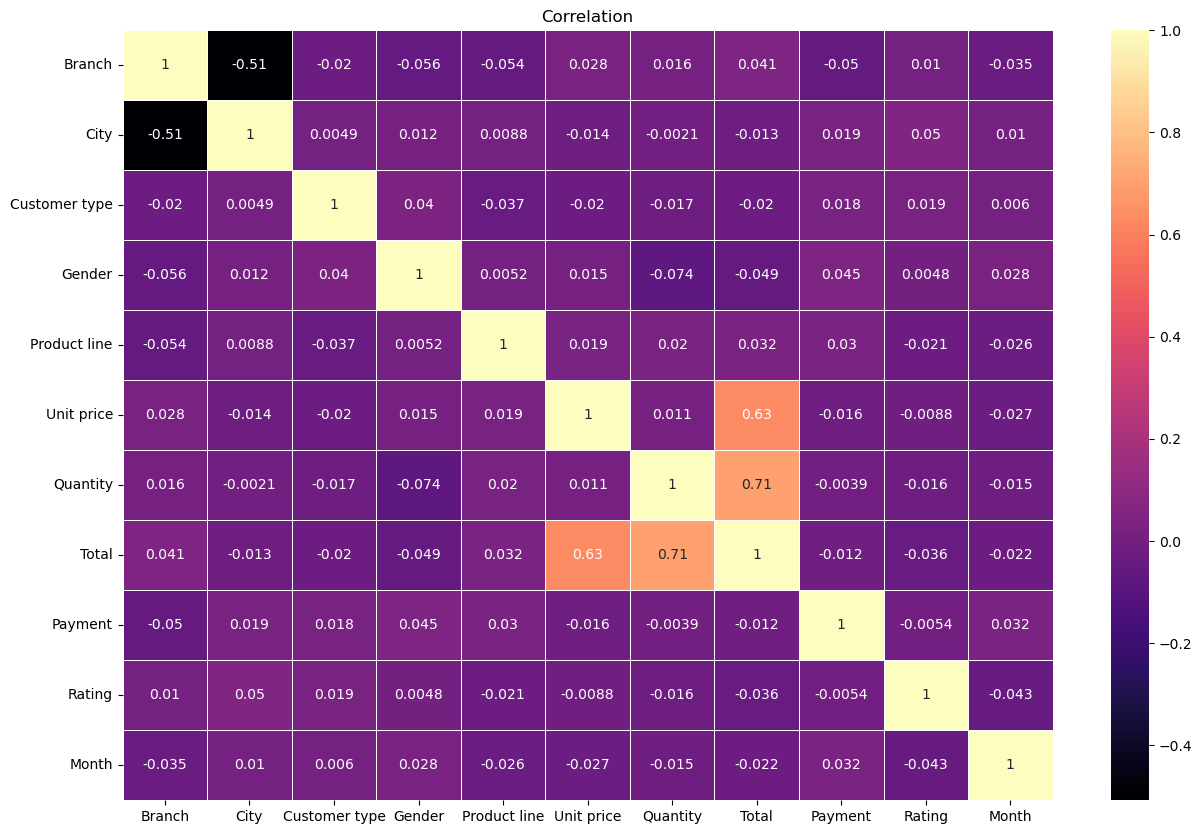

In [23]:
plt.figure(figsize=(15,10))
plt.title("Correlation")
sns.heatmap(data.corr(),annot=True,cmap='magma',linecolor='white',linewidths=0.5)
plt.show()

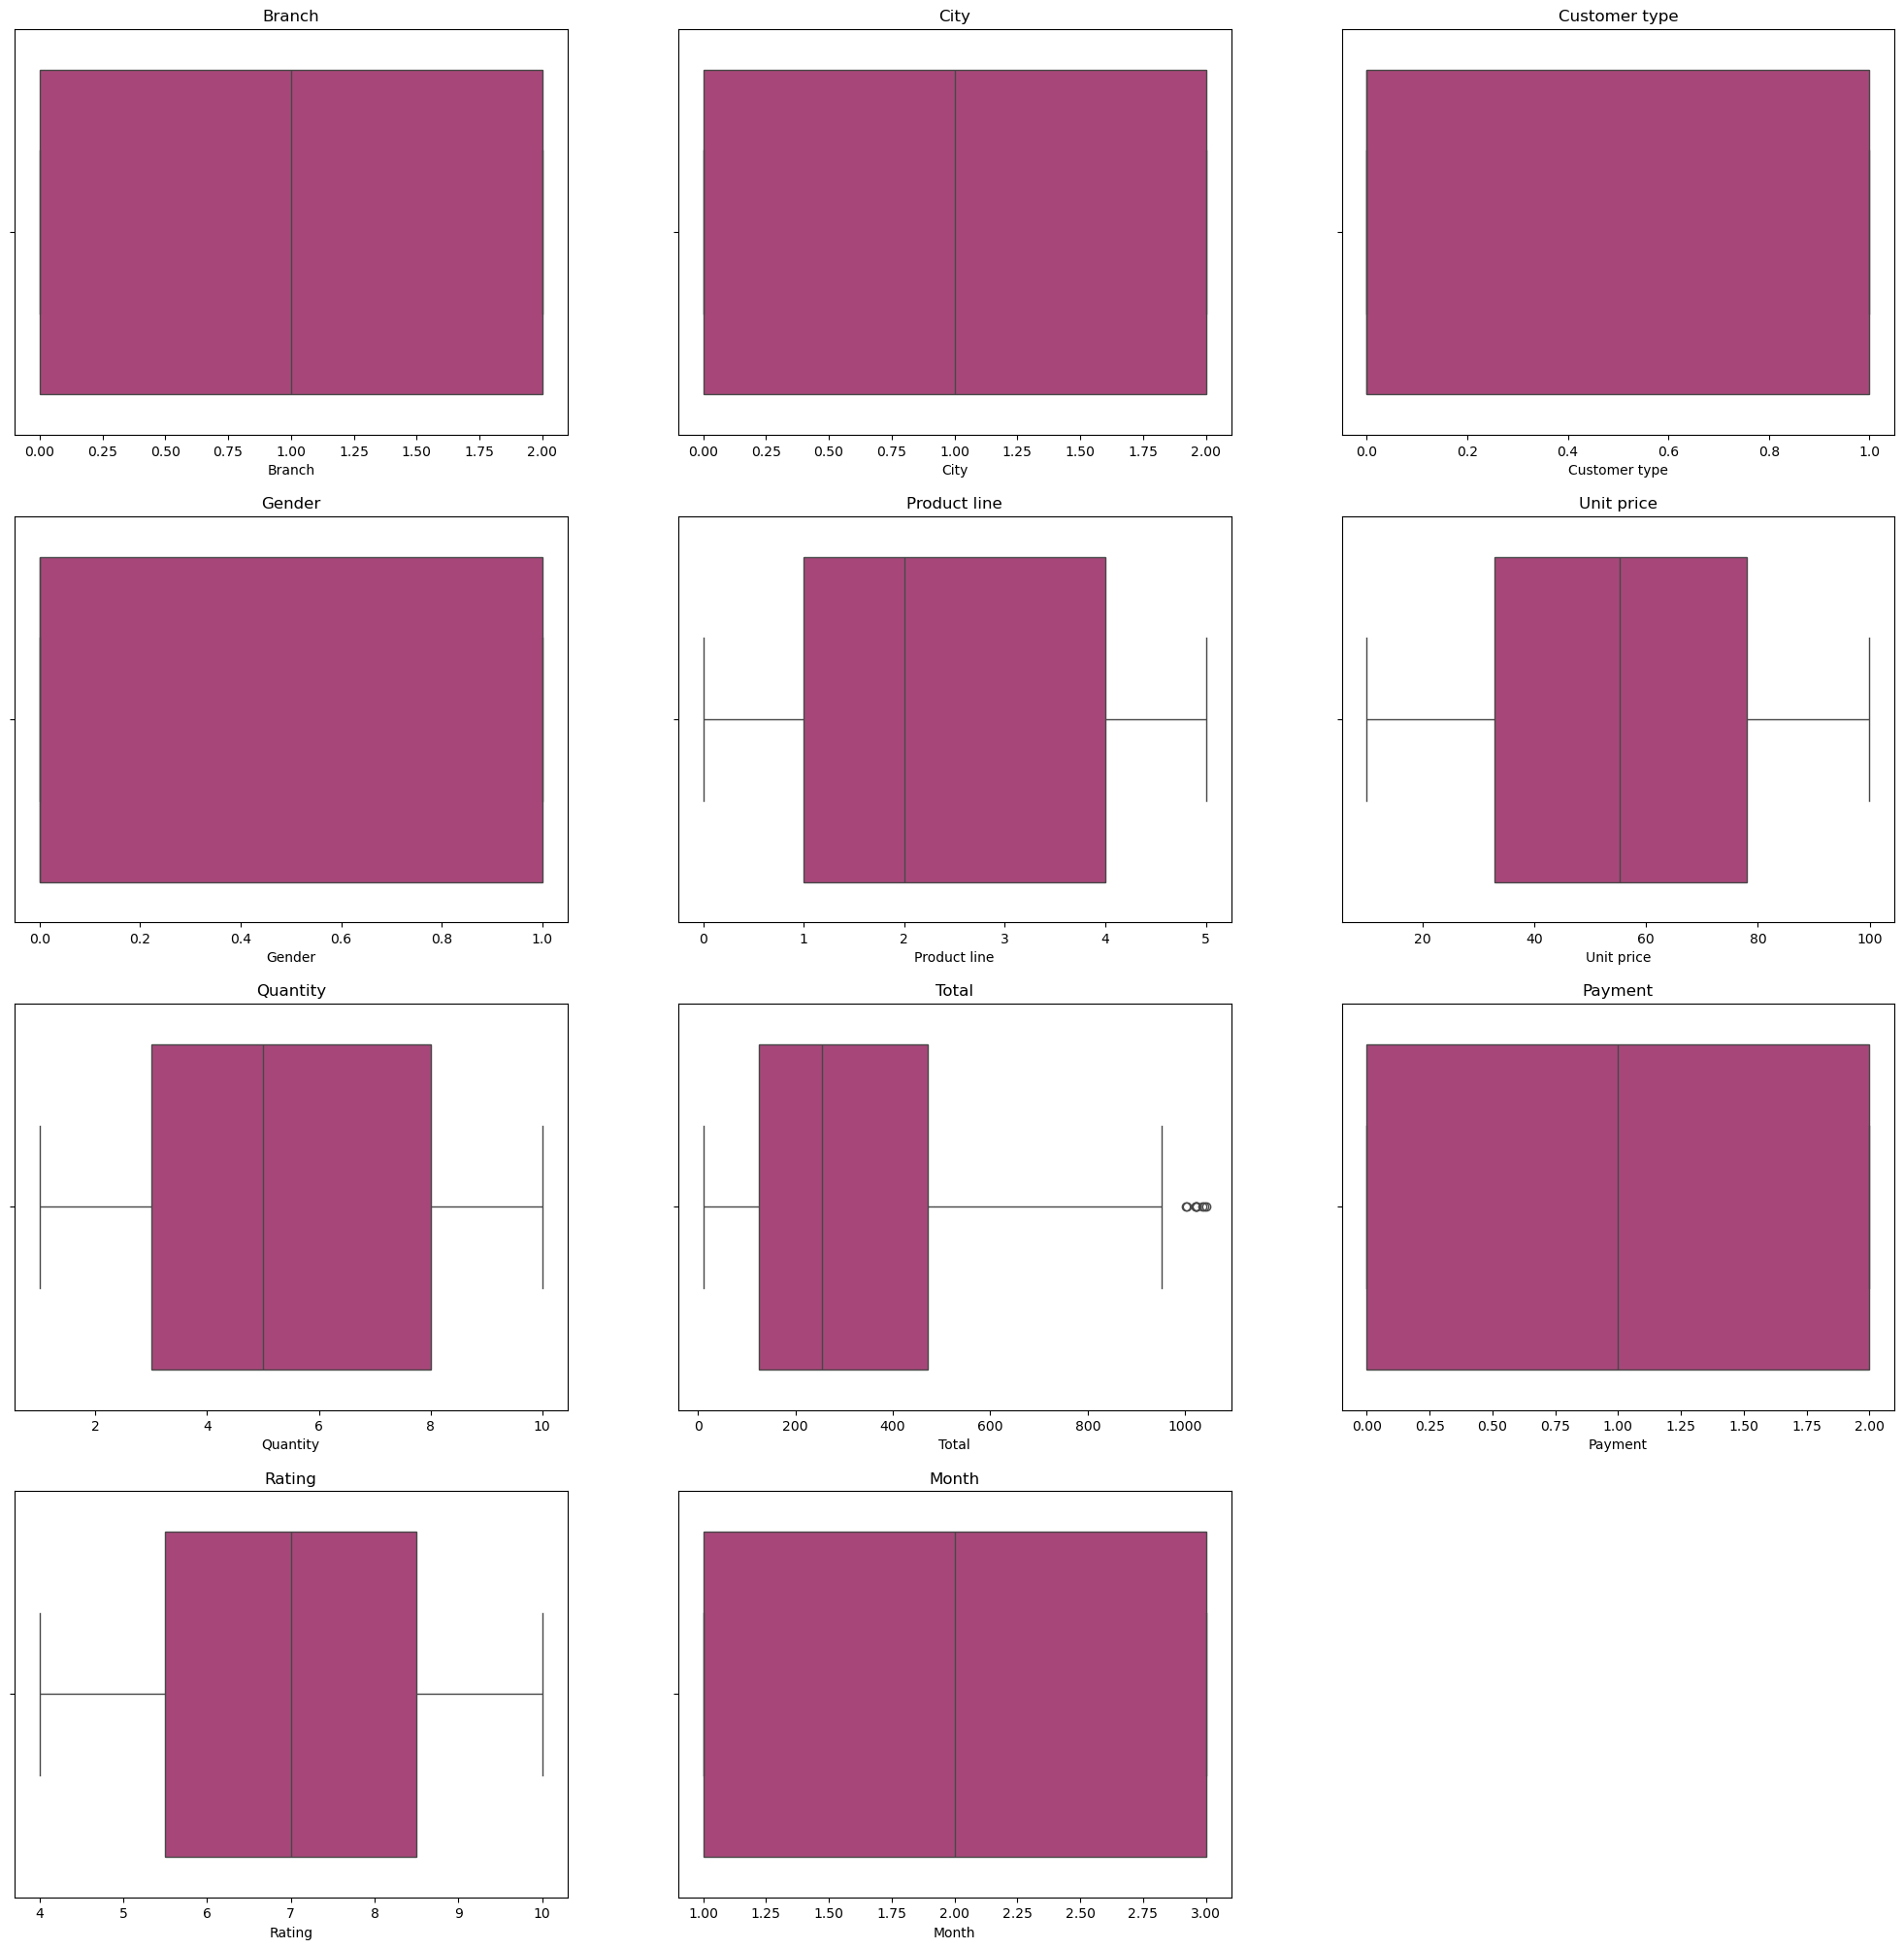

In [24]:
plt.figure(figsize=(25,25))
plot_num=1
for col in data.columns:
    plt.subplot(4,3,plot_num)
    plt.title(col.capitalize())
    sns.boxplot(data=data,x=col,palette='magma')
    plot_num+=1
plt.show()    

In [25]:
for col in data.columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR
    lower_outliers=data[data[col]<lower_fence][col].values
    upper_outliers=data[data[col]>upper_fence][col].values
    data[col].replace(lower_outliers,lower_fence,inplace=True)
    data[col].replace(upper_outliers,upper_fence,inplace=True)

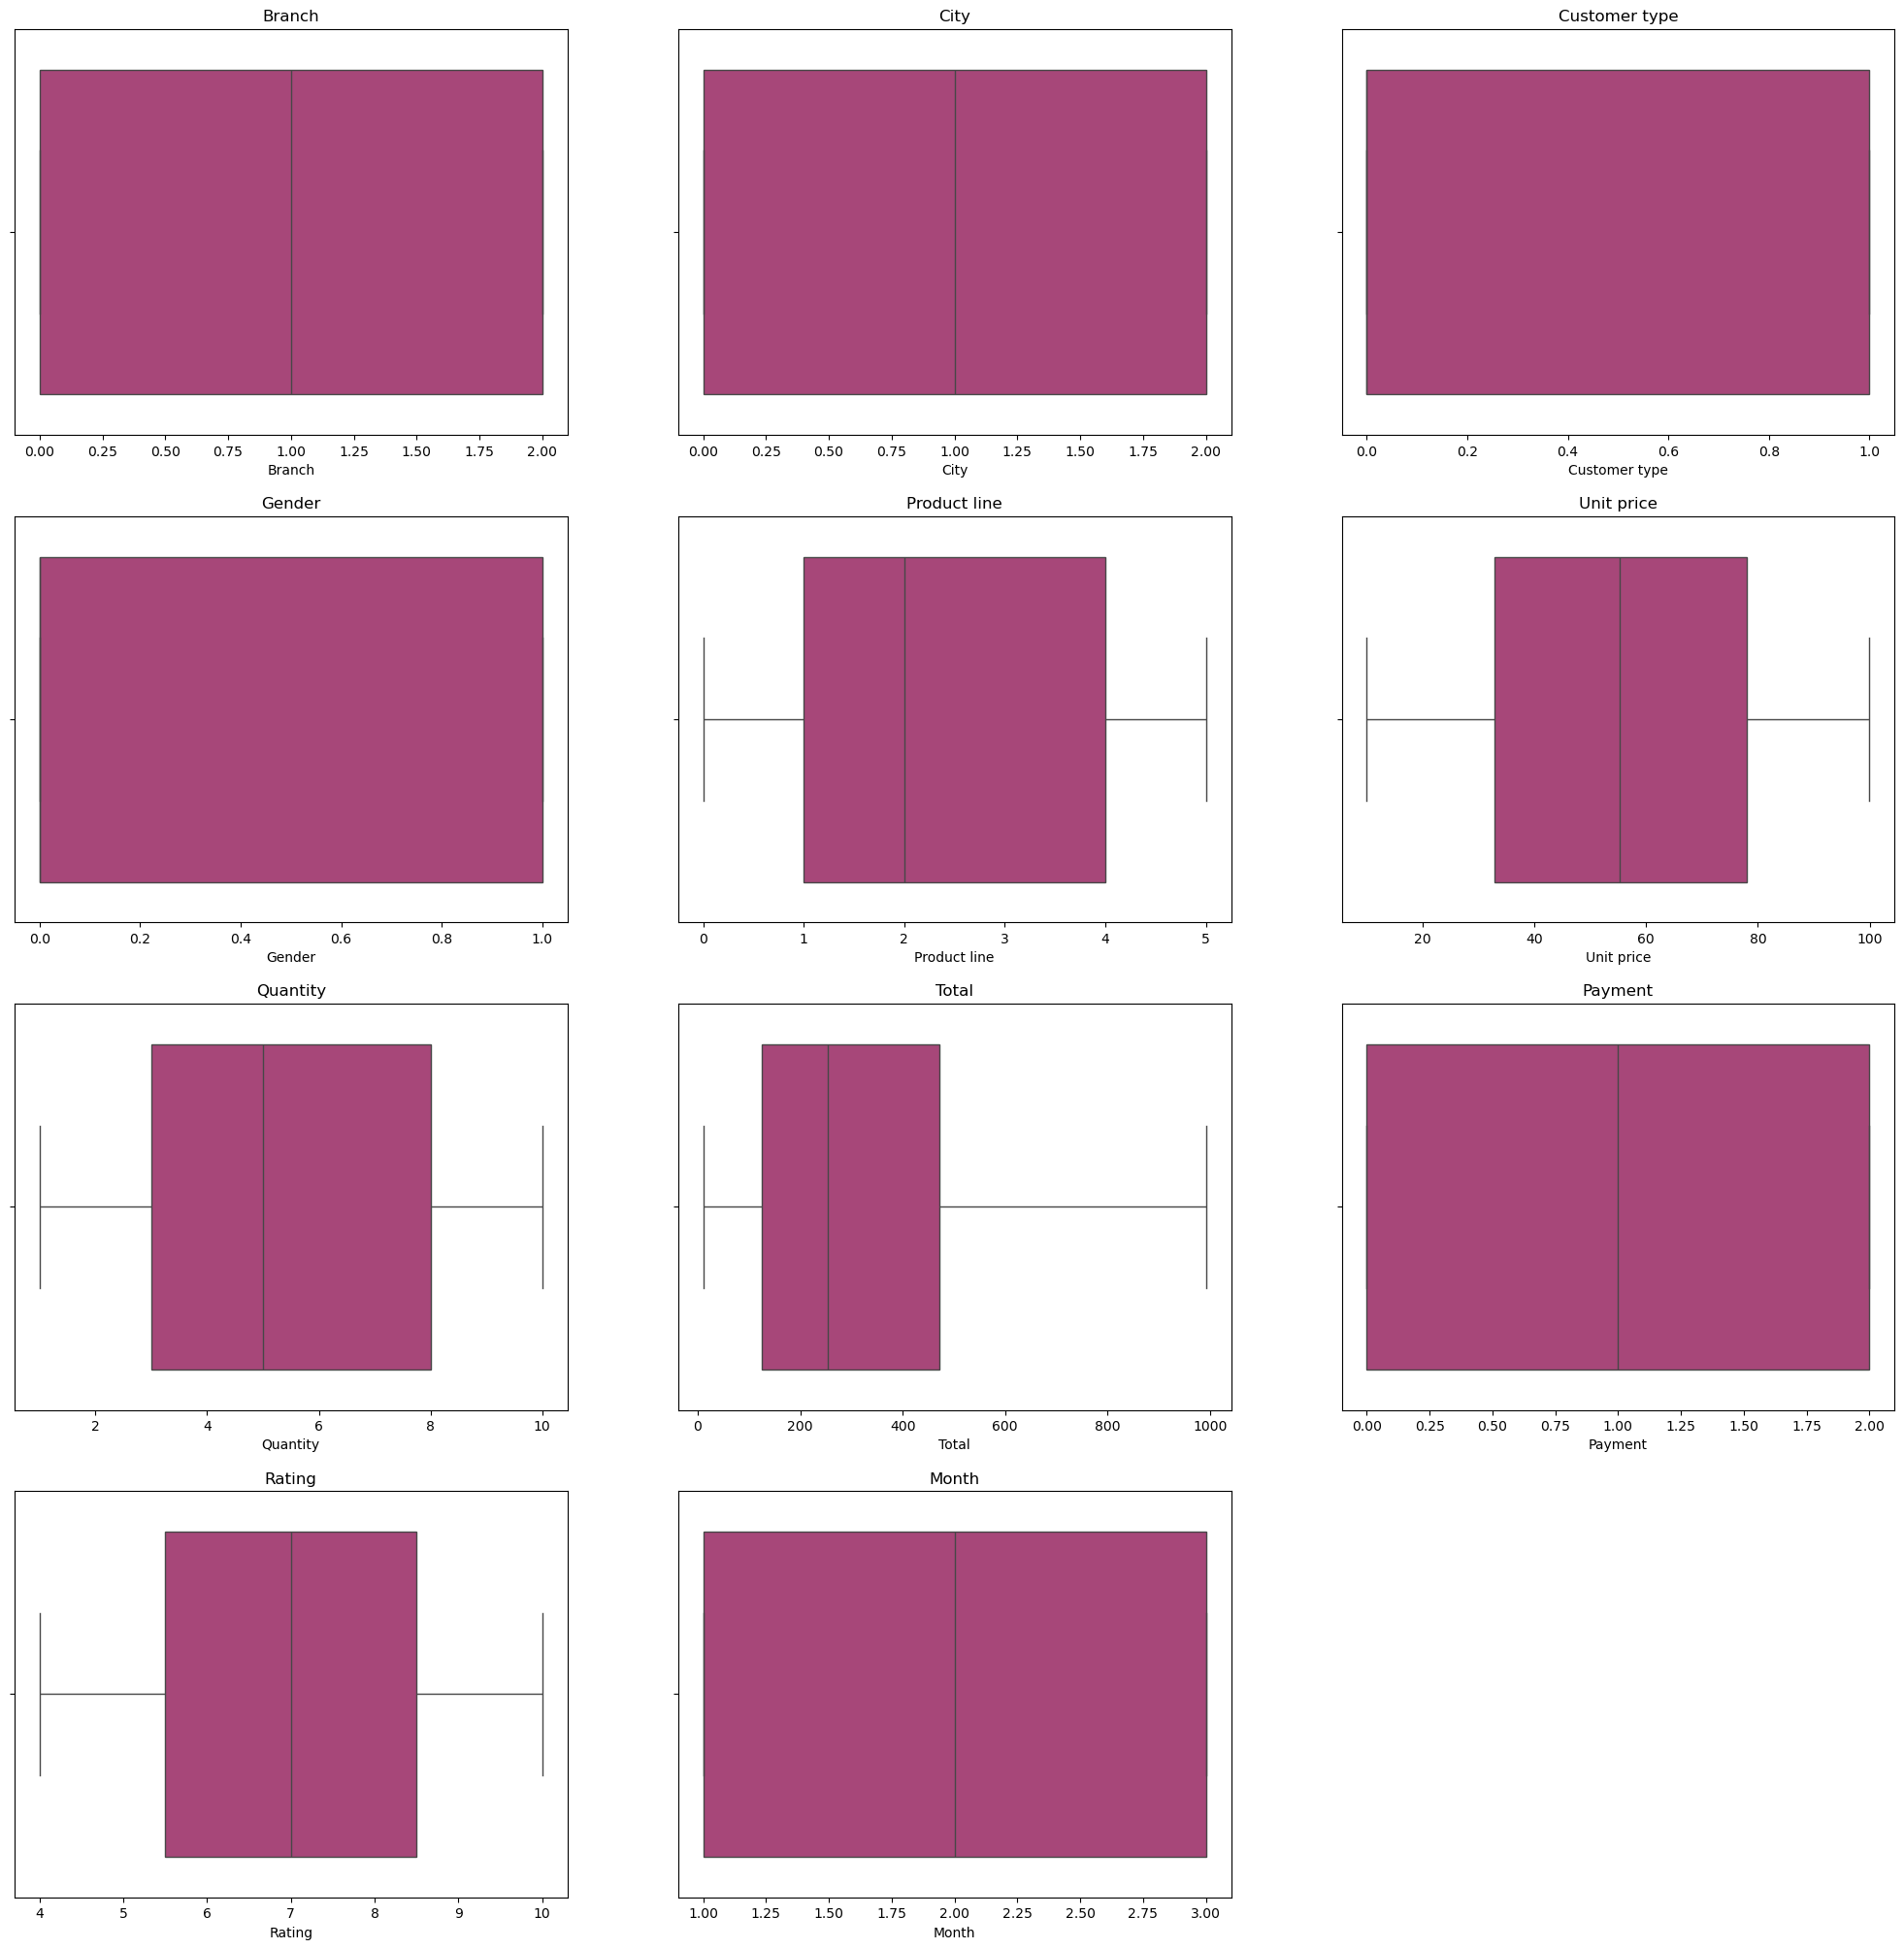

In [26]:
plt.figure(figsize=(25,25))
plot_num=1
for col in data.columns:
    plt.subplot(4,3,plot_num)
    plt.title(col.capitalize())
    sns.boxplot(data=data,x=col,palette='magma')
    plot_num+=1
plt.show()    

## Data Splitting

In [27]:
X=data.drop('Total',axis=1)
Y=data['Total']

In [28]:
def scaling(data):
    scalers={}
    for col in data.columns:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(np.array(data[col]).reshape(-1,1))
        scalers[col]=scaler
    return data,scalers    

In [29]:
X,scalers=scaling(X)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [31]:
pca=PCA(n_components=1)
x_train_component=pca.fit_transform(x_train)
x_test_component=pca.fit_transform(x_test)

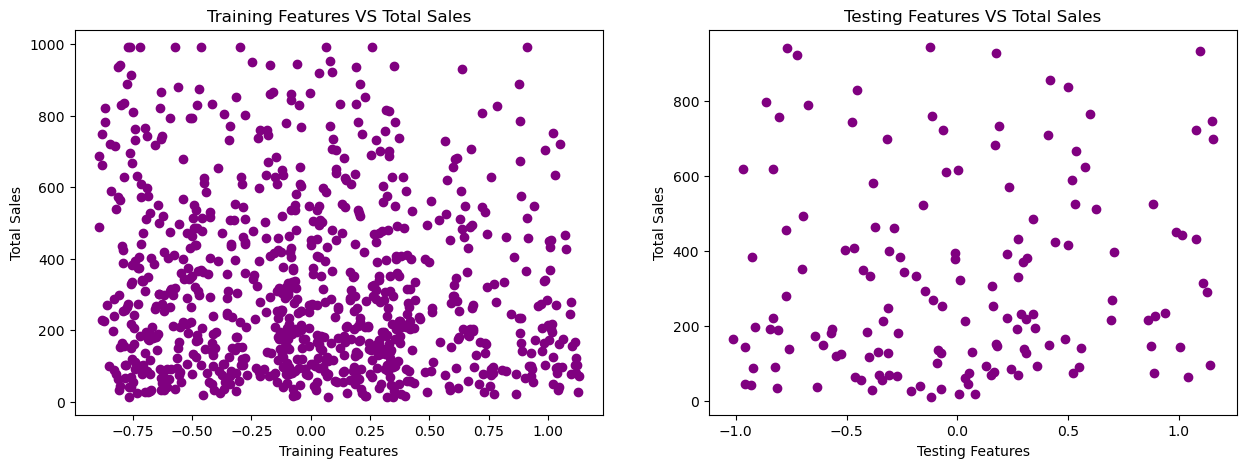

In [441]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Training Features VS Total Sales')
plt.xlabel('Training Features')
plt.ylabel('Total Sales')
plt.scatter(x_train_component,y_train,color='purple')
plt.subplot(1,2,2)
plt.title('Testing Features VS Total Sales')
plt.xlabel('Testing Features')
plt.ylabel('Total Sales')
plt.scatter(x_test_component,y_test,color='purple')
plt.show()

## Saving Label Encoders and Scalers

In [184]:
pickle.dump(lbls,open(r'Label Encoders & Scalers\Label_Encoders.pkl','wb'))
pickle.dump(scalers,open(r'Label Encoders & Scalers\Scalers.pkl','wb'))

## Loading Label Encoders and Scalers

In [185]:
lbls=pickle.load(open(r'Label Encoders & Scalers\Label_Encoders.pkl','rb'))
scalers=pickle.load(open(r'Label Encoders & Scalers\Scalers.pkl','rb'))

## Modeling and Evaluation

Linear Regression Model

In [33]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
pred_train1=LR.predict(x_train)
pred_test1=LR.predict(x_test)

In [35]:
print('MSE  = ',mean_squared_error(y_test,pred_test1))
print('MAE  = ',mean_absolute_error(y_test,pred_test1))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test1)*100,2),'%')

MSE  =  6128.426870383194
MAE  =  57.294558683729775
MAPE =  68.3 %


In [36]:
train_acc1=r2_score(y_train,pred_train1)
test_acc1=r2_score(y_test,pred_test1)

In [37]:
print('Training Accuracy = ',round(train_acc1*100,2),'%')
print('Testing Accuracy  = ',round(test_acc1*100,2),'%')

Training Accuracy =  88.92 %
Testing Accuracy  =  90.42 %


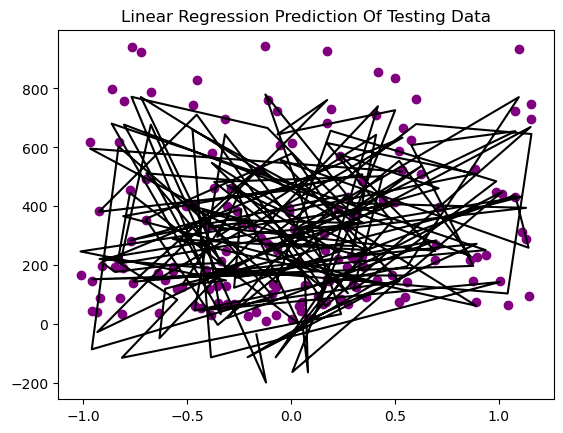

In [432]:
plt.title('Linear Regression Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test1,color='black',label='Prediction Data')
plt.show()

Applying Polynomial Linear Regression Model 

In [38]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
poly_LR=LinearRegression()
poly_LR.fit(x_train_poly,y_train)

LinearRegression()

In [39]:
pred_train2=poly_LR.predict(x_train_poly)
pred_test2=poly_LR.predict(x_test_poly)

In [40]:
print('MSE  = ',mean_squared_error(y_test,pred_test2))
print('MAE  = ',mean_absolute_error(y_test,pred_test2))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test2)*100,2),'%')

MSE  =  3.068977291015624
MAE  =  1.2619154166666668
MAPE =  1.1 %


In [41]:
train_acc2=r2_score(y_train,pred_train2)
test_acc2=r2_score(y_test,pred_test2)

In [42]:
print('Training Accuracy = ',round(train_acc2*100,2),'%')
print('Testing Accuracy  = ',round(test_acc2*100,2),'%')

Training Accuracy =  99.98 %
Testing Accuracy  =  100.0 %


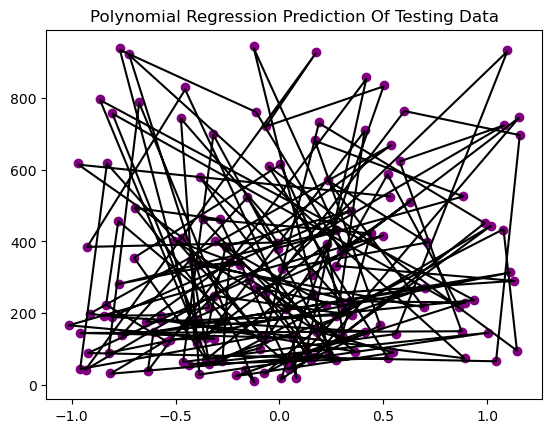

In [433]:
plt.title('Polynomial Regression Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test2,color='black',label='Prediction Data')
plt.show()

SVM Regressor Model

In [238]:
svm=SVR(C=100,kernel='poly')
svm.fit(x_train,y_train)

SVR(C=100, kernel='poly')

In [239]:
pred_train3=svm.predict(x_train)
pred_test3=svm.predict(x_test)

In [240]:
print('MSE  = ',mean_squared_error(y_test,pred_test3))
print('MAE  = ',mean_absolute_error(y_test,pred_test3))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test3)*100,2),'%')

MSE  =  542.3555597474618
MAE  =  16.430501288137737
MAPE =  14.48 %


In [241]:
train_acc3=r2_score(y_train,pred_train3)
test_acc3=r2_score(y_test,pred_test3)

In [242]:
print('Training Accuracy = ',round(train_acc3*100,2),'%')
print('Testing Accuracy  = ',round(test_acc3*100,2),'%')

Training Accuracy =  99.13 %
Testing Accuracy  =  99.15 %


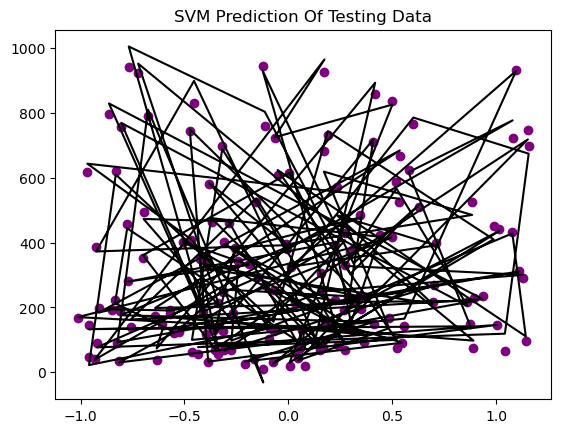

In [434]:
plt.title('SVM Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test3,color='black',label='Prediction Data')
plt.show()

Decision Tree Regressor Model 

In [273]:
DT=DecisionTreeRegressor(criterion='squared_error',max_depth=15,random_state=42)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [274]:
pred_train4=DT.predict(x_train)
pred_test4=DT.predict(x_test)

In [275]:
print('MSE  = ',mean_squared_error(y_test,pred_test4))
print('MAE  = ',mean_absolute_error(y_test,pred_test4))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test4)*100,2),'%')

MSE  =  173.31470299500003
MAE  =  8.367450000000002
MAPE =  3.93 %


In [276]:
train_acc4=r2_score(y_train,pred_train4)
test_acc4=r2_score(y_test,pred_test4)

In [277]:
print('Training Accuracy = ',round(train_acc4*100,2),'%')
print('Testing Accuracy  = ',round(test_acc4*100,2),'%')

Training Accuracy =  100.0 %
Testing Accuracy  =  99.73 %


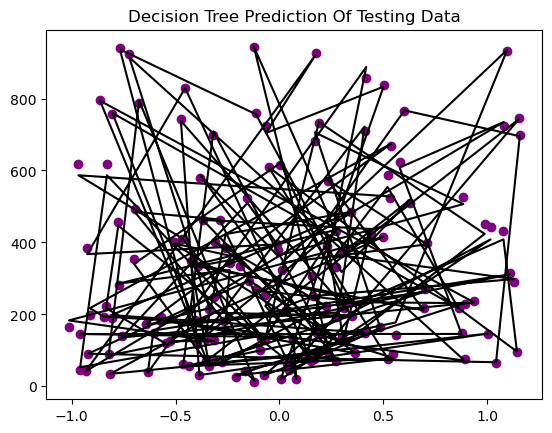

In [435]:
plt.title('Decision Tree Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test4,color='black',label='Prediction Data')
plt.show()

Random Forest Regression Model

In [293]:
RF=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=15,random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [294]:
pred_train5=RF.predict(x_train)
pred_test5=RF.predict(x_test)

In [295]:
print('MSE  = ',mean_squared_error(y_test,pred_test5))
print('MAE  = ',mean_absolute_error(y_test,pred_test5))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test5)*100,2),'%')

MSE  =  66.76653684906317
MAE  =  5.487249949999964
MAPE =  2.52 %


In [296]:
train_acc5=r2_score(y_train,pred_train5)
test_acc5=r2_score(y_test,pred_test5)

In [297]:
print('Training Accuracy = ',round(train_acc5*100,2),'%')
print('Testing Accuracy  = ',round(test_acc5*100,2),'%')

Training Accuracy =  99.98 %
Testing Accuracy  =  99.9 %


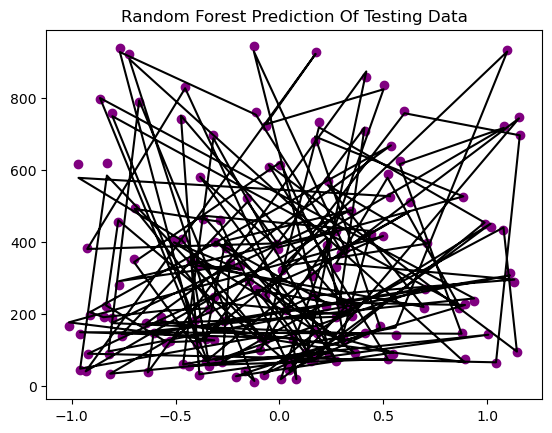

In [437]:
plt.title('Random Forest Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test5,color='black',label='Prediction Data')
plt.show()

Boosting Regressor Model

In [323]:
boost=AdaBoostRegressor(n_estimators=50,estimator=svm,loss='square',random_state=42)
boost.fit(x_train,y_train)

AdaBoostRegressor(estimator=SVR(C=100, kernel='poly'), loss='square',
                  random_state=42)

In [324]:
pred_train6=boost.predict(x_train)
pred_test6=boost.predict(x_test)

In [325]:
print('MSE  = ',mean_squared_error(y_test,pred_test6))
print('MAE  = ',mean_absolute_error(y_test,pred_test6))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test6)*100,2),'%')

MSE  =  839.5127903140243
MAE  =  23.31647920127488
MAPE =  18.4 %


In [326]:
train_acc6=r2_score(y_train,pred_train6)
test_acc6=r2_score(y_test,pred_test6)

In [327]:
print('Training Accuracy = ',round(train_acc6*100,2),'%')
print('Testing Accuracy  = ',round(test_acc6*100,2),'%')

Training Accuracy =  99.27 %
Testing Accuracy  =  98.69 %


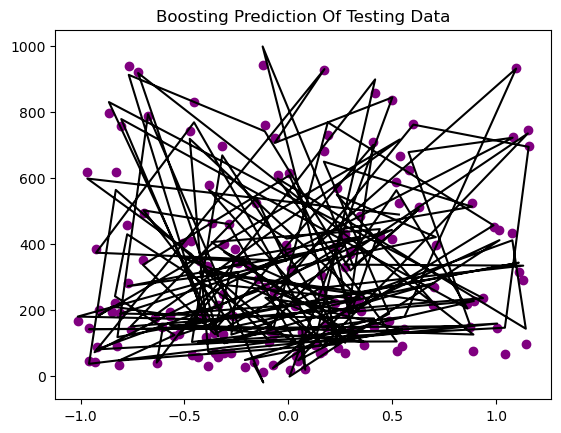

In [438]:
plt.title('Boosting Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test6,color='black',label='Prediction Data')
plt.show()

Bagging Regressor Model

In [338]:
bagging=BaggingRegressor(n_estimators=50,estimator=svm,random_state=42)
bagging.fit(x_train,y_train)

BaggingRegressor(estimator=SVR(C=100, kernel='poly'), n_estimators=50,
                 random_state=42)

In [339]:
pred_train7=bagging.predict(x_train)
pred_test7=bagging.predict(x_test)

In [340]:
print('MSE  = ',mean_squared_error(y_test,pred_test7))
print('MAE  = ',mean_absolute_error(y_test,pred_test7))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test7)*100,2),'%')

MSE  =  536.9114005343433
MAE  =  16.143218942022227
MAPE =  13.4 %


In [341]:
train_acc7=r2_score(y_train,pred_train7)
test_acc7=r2_score(y_test,pred_test7)

In [342]:
print('Training Accuracy = ',round(train_acc7*100,2),'%')
print('Testing Accuracy  = ',round(test_acc7*100,2),'%')

Training Accuracy =  99.17 %
Testing Accuracy  =  99.16 %


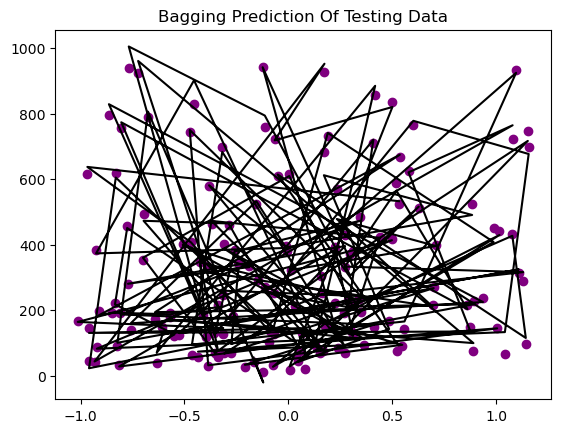

In [439]:
plt.title('Bagging Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test7,color='black',label='Prediction Data')
plt.show()

XGBoost Regressor Model

In [353]:
xgb=XGBRegressor(n_estimator=100,max_depth=15,learning_rate=0.1,random_state=42)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [354]:
pred_train8=xgb.predict(x_train)
pred_test8=xgb.predict(x_test)

In [355]:
print('MSE  = ',mean_squared_error(y_test,pred_test8))
print('MAE  = ',mean_absolute_error(y_test,pred_test8))
print('MAPE = ',round(mean_absolute_percentage_error(y_test,pred_test8)*100,2),'%')

MSE  =  67.82932665734151
MAE  =  5.071692066040038
MAPE =  2.77 %


In [356]:
train_acc8=r2_score(y_train,pred_train8)
test_acc8=r2_score(y_test,pred_test8)

In [357]:
print('Training Accuracy = ',round(train_acc8*100,2),'%')
print('Testing Accuracy  = ',round(test_acc8*100,2),'%')

Training Accuracy =  100.0 %
Testing Accuracy  =  99.89 %


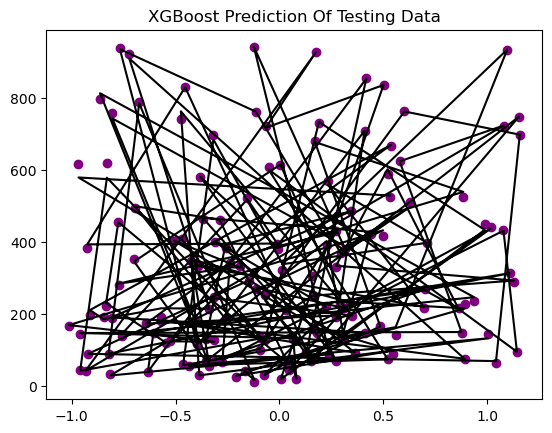

In [440]:
plt.title('XGBoost Prediction Of Testing Data')
plt.scatter(x_test_component,y_test,color='purple',label='Actual Data')
plt.plot(x_test_component,pred_test8,color='black',label='Prediction Data')
plt.show()

## Saving Models

In [358]:
pickle.dump(LR,open(r'models\LR_model.pkl','wb'))
pickle.dump(poly_LR,open(r'models\Poly_Regression_model.pkl','wb'))
pickle.dump(svm,open(r'models\SVR_model.pkl','wb'))
pickle.dump(DT,open(r'models\DTR_model.pkl','wb'))
pickle.dump(RF,open(r'models\RFR_model.pkl','wb'))
pickle.dump(boost,open(r'models\Boosting_model.pkl','wb'))
pickle.dump(bagging,open(r'models\Bagging_model.pkl','wb'))
pickle.dump(xgb,open(r'models\XGBoost_model.pkl','wb'))

## Loading Models

In [359]:
def load_models():
    LR=pickle.load(open(r'models\LR_model.pkl','rb'))
    poly_LR=pickle.load(open(r'models\Poly_Regression_model.pkl','rb'))
    svm=pickle.load(open(r'models\SVR_model.pkl','rb'))
    DT=pickle.load(open(r'models\DTR_model.pkl','rb'))
    RF=pickle.load(open(r'models\RFR_model.pkl','rb'))
    boost=pickle.load(open(r'models\Boosting_model.pkl','rb'))
    bagging=pickle.load(open(r'models\Bagging_model.pkl','rb'))
    xgb=pickle.load(open(r'models\XGBoost_model.pkl','rb'))
    return LR,poly_LR,svm,DT,RF,boost,bagging,xgb

In [360]:
LR,poly_LR,svm,DT,RF,boost,bagging,xgb=load_models()

## Test A New Record From Entered Data 

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   int32  
 1   City           1000 non-null   int32  
 2   Customer type  1000 non-null   int32  
 3   Gender         1000 non-null   int32  
 4   Product line   1000 non-null   int32  
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   int32  
 9   Rating         1000 non-null   float64
 10  Month          1000 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 58.7 KB


In [386]:
Test_record={'Branch':'A','City':'Yangon','Customer type':'Normal','Gender':'Male','Product line':'Sports and travel'
            ,'Unit price':55.55,'Quantity':5,'Payment':'Cash','Rating':7.4,'Month':2}

In [387]:
def preprocessing_record(record):
    for key,value in record.items():
        if key in lbls.keys():
            record[key]=lbls[key].transform([value])[0]
    for key,value in record.items():
        record[key]=scalers[key].transform(np.array([value]).reshape(-1,1))[0][0]
    return record            

In [388]:
preprocessed_record=preprocessing_record(Test_record)
preprocessed_record

{'Branch': 0.0,
 'City': 1.0,
 'Customer type': 1.0,
 'Gender': 1.0,
 'Product line': 1.0,
 'Unit price': 0.505896751223854,
 'Quantity': 0.4444444444444445,
 'Payment': 0.0,
 'Rating': 0.5666666666666668,
 'Month': 0.5}

In [417]:
def predict_test_record_poly(test_record,model):
    X_poly=poly.transform(np.array(list(test_record)).reshape(1,-1))
    prediction=model.predict(X_poly)
    return prediction[0]
def predict_test_record(test_record,model):
    prediction=model.predict(np.array(list(test_record)).reshape(1,-1))
    return prediction[0]

In [418]:
prediction=predict_test_record_poly(preprocessed_record.values(),poly_LR)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  291.609375 $


In [419]:
prediction=predict_test_record(preprocessed_record.values(),xgb)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  296.10214 $


In [420]:
prediction=predict_test_record(preprocessed_record.values(),LR)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  287.5286369818811 $


In [421]:
prediction=predict_test_record(preprocessed_record.values(),svm)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  287.83208544367704 $


In [422]:
prediction=predict_test_record(preprocessed_record.values(),DT)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  296.94 $


In [423]:
prediction=predict_test_record(preprocessed_record.values(),RF)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  285.2669399999997 $


In [424]:
prediction=predict_test_record(preprocessed_record.values(),boost)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  287.41497684940185 $


In [425]:
prediction=predict_test_record(preprocessed_record.values(),bagging)
print("Predicted Total Sales : ",prediction,'$')

Predicted Total Sales :  285.8810957238942 $
